# Lending Club Case Study

# Problem Statement
Working for a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
<br>
    1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
<br>
    2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
    <br>
<br>
The data given to us contains information about past loan applicants and whether they ‘defaulted’ or not. 
<br>
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 <br>
 <br>
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study
<br>
 <br>
Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.


# Steps Followed
1.	Import Required Libraries
<BR>
2.	Data Overview<BR>
3.	Data Cleaning<BR>
a.	Missing Data Treatment<BR>
b.	Standardizing Values<BR>
c.	Remove Irrelevant Variables<BR>
d.	Outliers Analysis and Treatments<BR>
e.	Derived Metrics & Binning<BR>
4.	Data Analysis<BR>
a.	Univariate Analysis<BR>
b.	Bivariate Analysis<BR>
c.	Multivariate Analysis<BR>
5.	Insights<BR>
6.	Recommendations<BR>




In [1]:
#Importing the required libraries
import numpy as np #Math library
import pandas as pd #To work with dataset
import matplotlib.pyplot as plt #Graph library that use matplot in background
import seaborn as sns  #to plot some parameters in seaborn
import warnings  #to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from csv and load in the dataframe
lend_data=pd.read_csv("loan.csv")
lend_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Overview

In [3]:
#Understand the list of variables and its info
lend_data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
#Find the number of rows and columns
lend_data.shape

(39717, 111)

# Data Cleaning

In [5]:
## Find number of rows which has null values in all the columns

print("Number of rows which has null values in all the columns: ".format(lend_data.isnull().all(axis=1).sum()))

Number of rows which has null values in all the columns: 


There are no rows with all null values
<br>
<br>
We hav 111 columns and 39717 rows.
<br>

Find the number of attributes (columns) which has all null values and drop the same.

In [6]:
#List the columns which has all null values and count the same
c=0
for i in lend_data.columns:
    if lend_data[i].isnull().sum()==lend_data.shape[0]:
        print(i)
        c+=1
print("Total number of columns which has all null values: ",c)

mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
Total number of columns which has all null values:  54


We can drop all 54 columns as these will not add values for our analysis


In [7]:
#Drop columns with all null values
lend_data.dropna(axis=1, how="all", inplace=True)

In [8]:
#Check the shape of data frame
lend_data.shape

(39717, 57)

Now we have 57 columns for the analysis.


Find the columns which has only one value

In [9]:
c=0
for i in lend_data.columns:
    if lend_data[i].nunique()==1:#check the column only with one unique value
        print(i)
        c+=1
print("Total number of columns with only one value: ",c)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
Total number of columns with only one value:  9


Above 9 variables are having single value or in combination with NA.<br>
Variables like collections_12_mths_ex_med, chargeoff_within_12_mths,tax_liens etc has value 0 or NA. As both values are not useful for our anlysis, we will drop these

In [10]:
#Drop the columns in dataframe
lend_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)
lend_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


Identify the attributes which has only unique values across the data

In [11]:
c=0
for i in lend_data.columns:
    if lend_data[i].nunique()==lend_data[i].shape[0]: #check columns only with unique values
        print(i)
        c+=1
print(c)

id
member_id
url
3


 1) "id", "member_id","url": Remove unique value attributes. As these are unique values, it will not be much useful for our analysis. 
<br>
2) "title", "emp_title","zip_code", "desc": These customer specific columns will also not contribute to our loan defaulting analysis and hence dropping the same
<br>
3) Below attributes are specific to post loan approval process and hence we can drop it. delinq_2yrs,"last_credit_pull_d",mths_since_last_delinq,mths_since_last_record,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,out_prncp_inv,total_pymnt_inv,funded_amnt.



In [12]:
#Drop the columns in dataframe
lend_data.drop(["id", "member_id","url","title","emp_title", "zip_code","desc","delinq_2yrs","last_credit_pull_d","mths_since_last_delinq","mths_since_last_record","revol_bal","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","out_prncp_inv","total_pymnt_inv","funded_amnt"], axis = 1, inplace = True)


In [13]:
lend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt_inv       39717 non-null  float64
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

#### Analyze pub_rec_bankruptcies Variable

In [14]:
#Describe pub_rec_bankruptcies
lend_data['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

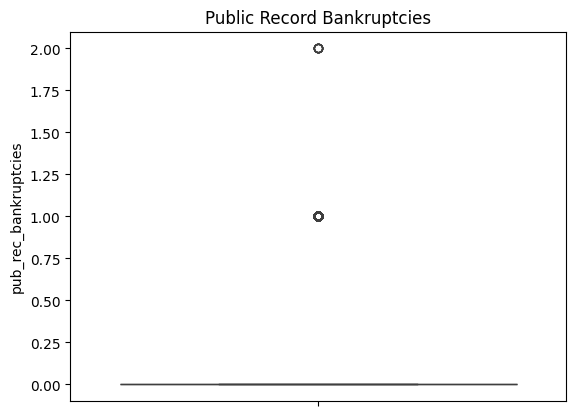

In [15]:
#Draw the box plot to identify outliers
sns.boxplot(lend_data['pub_rec_bankruptcies'])
plt.title("Public Record Bankruptcies")
plt.show()

As maximum values in "pub_rec_bankruptcies" attribute are 0, dropping this attribute.

In [16]:
lend_data.drop(["pub_rec_bankruptcies"], axis = 1, inplace = True)

In [17]:
lend_data.shape

(39717, 22)

Now we have 22 columns. Lets understand the features of each columns

In [18]:
lend_data.info()
# lend_Data is the name of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

We will analyze the object columns first. <br> 
Finding value count for all object variables

In [19]:
for i in lend_data.columns[lend_data.dtypes == 'object']:
    print(lend_data[i].value_counts())
    print('-----------------------------------------------')

term
36 months    29096
60 months    10621
Name: count, dtype: int64
-----------------------------------------------
int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64
-----------------------------------------------
grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
-----------------------------------------------
sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64
-----------------------------------------------
emp_len

## Data Standardizing Values

 Term , int_rate,revol_util,emp_length has some strings and need to convert to numeric value
 We can observe this from the above output

In [20]:
#Remove months from the term and convert the type to int
lend_data["term"]=lend_data["term"].str.replace(" months","").astype("int")

In [21]:
#Remove % from the interest rate and convert the type to float
lend_data["int_rate"]=lend_data["int_rate"].str.replace("%","").astype("float")

In [22]:
#Remove % from the verifica and convert the type to float
lend_data["verifica"]=lend_data["verifica"].str.replace("%","").astype("float")

In [23]:
#Find the % of null values in emplyment length variable
lend_data['emp_length'].isnull().sum()/lend_data['emp_length'].count()

0.02781947104187154

Only ~2.7% of data has null values and hence replace null value with mode value

In [24]:
#Fill null value of emp_length with mode of emp_length
lend_data['emp_length'] = lend_data['emp_length'].fillna(lend_data['emp_length'].mode()[0])

In [25]:
#emp_length column convert to int considering 0 means less than one year and 10 means ten or more years
lend_data['emp_length'] = lend_data['emp_length'].map(lambda x:x.split('+ years')[0] if x == '10+ years' else ('0' if x == '< 1 year' else(x.strip(' years')))).astype(int)


In [26]:
#Finding ratio if null values for remaining columns

(lend_data.isna().sum()/len(lend_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
verifica               0.125891
total_acc              0.000000
dtype: float64

Only revol_util has null values. As this attribute is giving the credit utilization rate, it is important for our analysis. As we cant default with any value, we will remove the rows which has null value in this columns

In [27]:
#Drop rows which has null verifica values
lend_data.dropna(axis = 0, subset = ["verifica"] , inplace = True)

Compute month and year data for issue_d & earliest_cr_line attributes and store in new columns

In [28]:
#convert the variable to date format
lend_data["issue_d"] = pd.to_datetime(lend_data['issue_d'],format='%b-%y')

In [29]:
#Extract month and year from issue date variable and store in new variables
lend_data["issue_date_year"]=pd.DatetimeIndex(lend_data['issue_d']).year
lend_data["issue_date_month"]=pd.DatetimeIndex(lend_data['issue_d']).month

In [30]:
#convert the variable to date format
lend_data["earliest_cr_line"] = pd.to_datetime(lend_data['earliest_cr_line'],format='%b-%y')

In [31]:
#Extract month and year from earliest_cr_line variable and store in new variables
lend_data["earliest_cr_line_year"]=pd.DatetimeIndex(lend_data['earliest_cr_line']).year
lend_data["earliest_cr_line_month"]=pd.DatetimeIndex(lend_data['earliest_cr_line']).month

In [32]:
lend_data.head() 

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,verifica,total_acc,issue_date_year,issue_date_month,earliest_cr_line_year,earliest_cr_line_month
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,1985-01-01,1,3,0,83.7,9,2011,12,1985,1
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,1999-04-01,5,3,0,9.4,4,2011,12,1999,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,2001-11-01,2,2,0,98.5,10,2011,12,2001,11
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,1996-02-01,1,10,0,21.0,37,2011,12,1996,2
4,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,...,1996-01-01,0,15,0,53.9,38,2011,12,1996,1


# Filtering Data

As we are analysing on defaulters posibilities, we need to consider only "Fully Paid" and "Charges Off" load statuses 

In [33]:
#Remove data with loan status as current
lend_data = lend_data[lend_data.loan_status != "Current"]

# Data Analysis

In [34]:
lend_data.shape

(38527, 26)

In [35]:
#Create list variables to store continuous and categorial variables separately
cont=['loan_amnt','funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti','inq_last_6mths', 'open_acc', 'pub_rec', 'verifica', 'total_acc']
catg= ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line']

In [36]:
lend_data[cont]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,verifica,total_acc
0,5000,4975.0,36,10.65,162.87,10,24000.0,27.65,1,3,0,83.7,9
1,2500,2500.0,60,15.27,59.83,0,30000.0,1.00,5,3,0,9.4,4
2,2400,2400.0,36,15.96,84.33,10,12252.0,8.72,2,2,0,98.5,10
3,10000,10000.0,36,13.49,339.31,10,49200.0,20.00,1,10,0,21.0,37
5,5000,5000.0,36,7.90,156.46,3,36000.0,11.20,3,9,0,28.3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36,8.07,78.42,4,110000.0,11.33,0,13,0,13.1,40
39713,8500,875.0,36,10.28,275.38,3,18000.0,6.40,1,6,0,26.9,9
39714,5000,1325.0,36,8.07,156.84,0,100000.0,2.30,0,11,0,19.4,20
39715,5000,650.0,36,7.43,155.38,0,200000.0,3.72,0,17,0,0.7,26


Lets analyze "annual_inc" attribute

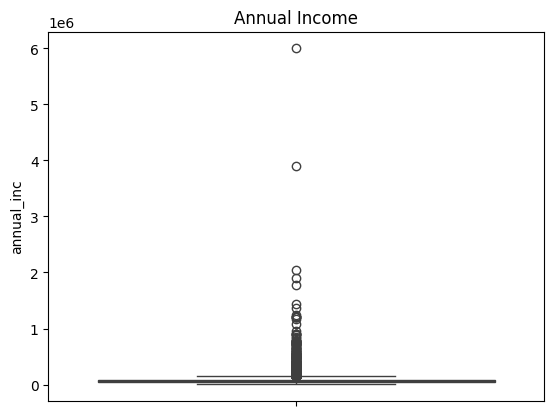

In [37]:
#Draw boxplot to find outliers
sns.boxplot(lend_data['annual_inc'])
plt.title("Annual Income")
plt.show()

It seems we have outliers in annual income. lets understand the outliers with percentile functions

In [38]:
#Print annual income value for below listed quantile
lend_data.annual_inc.quantile([0.1,0.15,0.2,0.25,0.5, 0.7,0.75,0.8,0.85,0.9, 0.95,0.96, 0.97,0.98, 0.99])

0.10     30000.0
0.15     34000.0
0.20     37200.0
0.25     40000.0
0.50     59000.0
0.70     75000.0
0.75     82000.0
0.80     90000.0
0.85    100000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

From above data, we can see more outliers are from 0.96 percentile. So we will consider only the data which has annual income of lesser or equal to 95 percentile

In [39]:
#Remove the rows with annual income greater than 95 percentile
lend_data = lend_data[lend_data.annual_inc <= lend_data.annual_inc.quantile(0.95)]

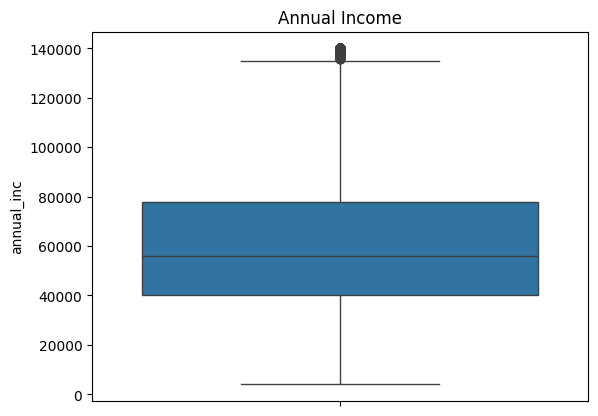

In [40]:
#Draw boxplot after outlier treatment
sns.boxplot(lend_data['annual_inc'])
plt.title("Annual Income")
plt.show()

Lets create a new function to print graph and requried variables for analysis

In [41]:
def univ_cont_anlys(cont_var,x_size=6,y_size=6,color_v="g",bin="auto"):
    plt.figure(figsize=(x_size,y_size))
    
    plt.boxplot(lend_data[cont_var]) #Draw box plot for given variable
    
    plt.title(cont_var)
    
    plt.xlabel(cont_var)
    
    plt.ylabel("Quartile Range")
    
    plt.show()
    
    plt.hist(lend_data[cont_var],color=color_v,bins=bin,edgecolor='blue') #Draw histogram for given variable
    
    plt.title(cont_var)
    
    plt.xlabel(cont_var)
    
    plt.ylabel("Frequency")
    
    plt.show()
    print(lend_data[cont_var].describe()) #describe the given variable
    
  

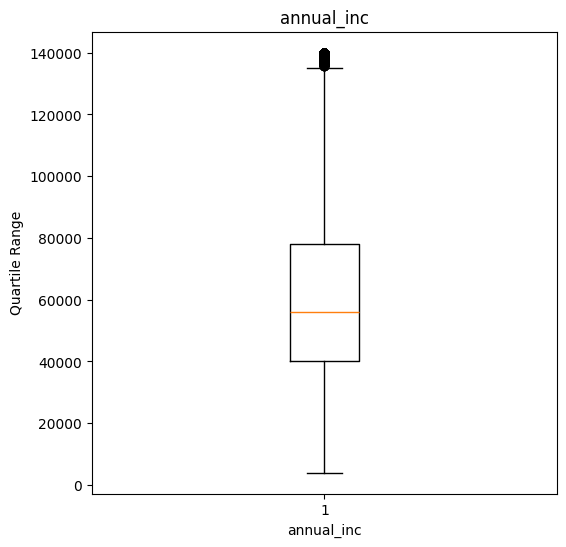

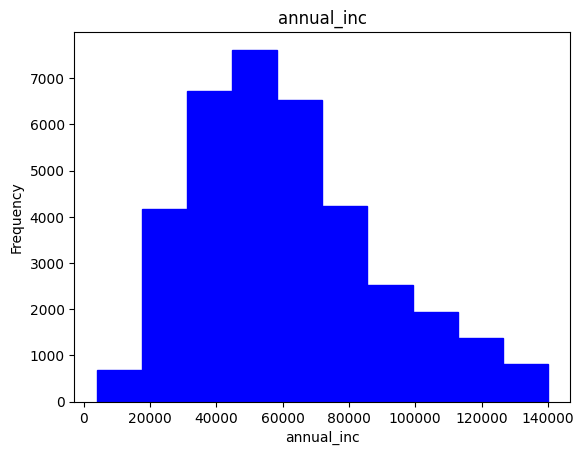

count     36606.000000
mean      60890.563839
std       27741.337421
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      140004.000000
Name: annual_inc, dtype: float64


In [42]:
# Univariate Analysis for annual_inc
univ_cont_anlys('annual_inc',color_v='b',bin=10)

##### Annual Income Variable Insights
After cleaning outliers earlier, we can see maximum number of loan are uner 4th slab between 50000 and 60000

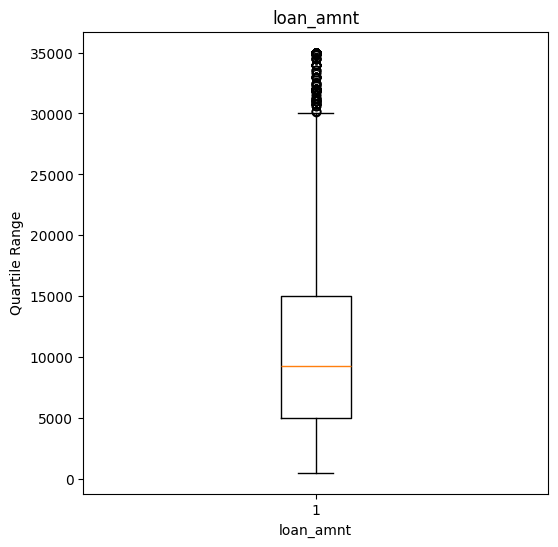

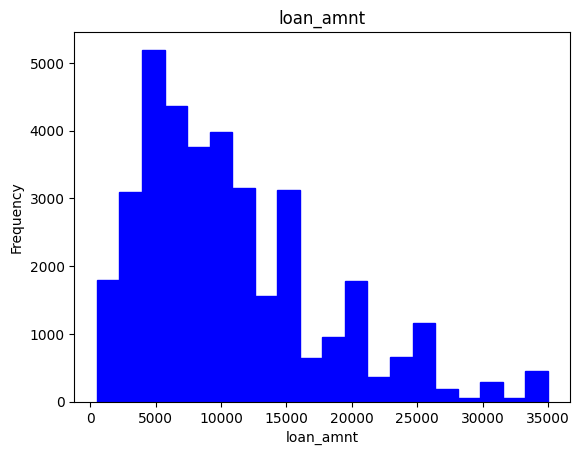

count    36606.000000
mean     10690.058324
std       7048.412687
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [43]:
# Univariate Analysis for Loan Amount
univ_cont_anlys('loan_amnt',color_v='b',bin=20)

##### Loan Amount Insights
There is no much outliers with bigger difference and hence no cleanup required
<br>
Maximum loan applications are in 3rd bin of loan amount ie around 5000.

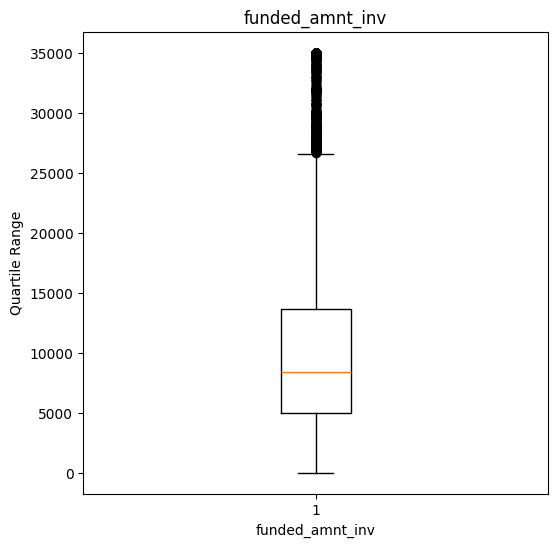

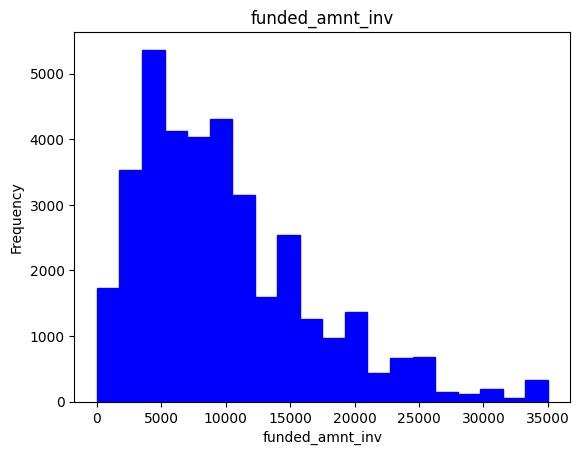

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [44]:
# Univariate Analysis for Funded Amount Investor
univ_cont_anlys('funded_amnt_inv',color_v='b',bin=20)

##### Funded Amount and Funded Amount Investors Variables Insights
There is no much outliers with bigger difference and hence no cleanup required
<br>
Maximum loan applications are in 3rd bin of funded loan investor amount ie around 5000.

term
36    27676
60     8930
Name: count, dtype: int64


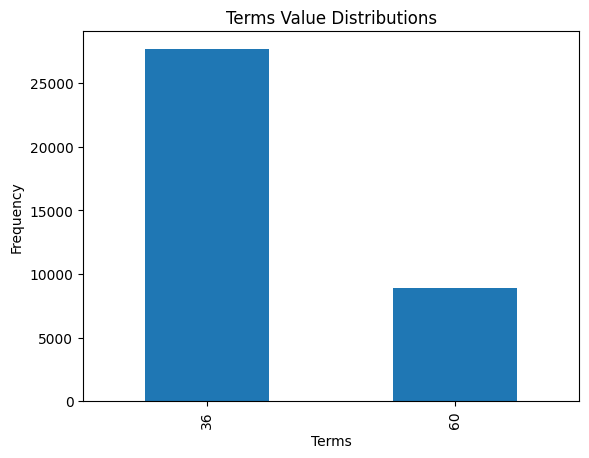

In [45]:
# Univariate Analysis for term
print(lend_data['term'].value_counts()) # Print count of each values
lend_data['term'].value_counts().plot.bar() #Draw bar plot based on value count
plt.title("Terms Value Distributions")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.show()

##### Term Variable Insights
We have only two terms 36 & 60
<Br>
Maximum number of loans are in 36 terms only

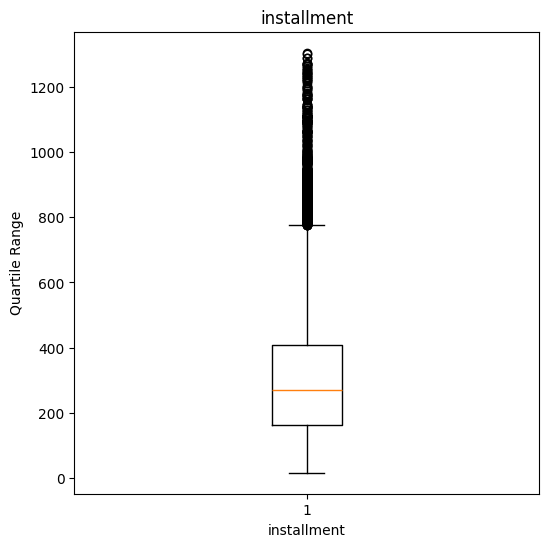

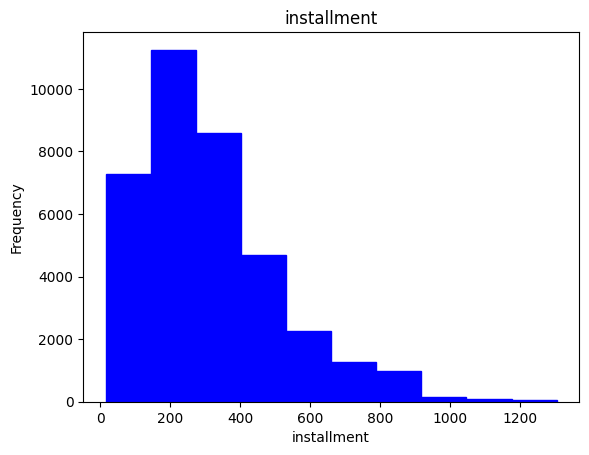

count    36606.000000
mean       312.088564
std        199.238384
min         15.690000
25%        163.110000
50%        270.845000
75%        408.902500
max       1305.190000
Name: installment, dtype: float64


In [46]:
# Univariate Analysis for installment
univ_cont_anlys('installment',color_v='b',bin=10)

##### Installment Variable Insights
Maximum number of loan are in 2nd bin of the installments (roughly between 150 and 275 installments)
<br>
There is no much outliers with bigger difference and hence no cleanup required

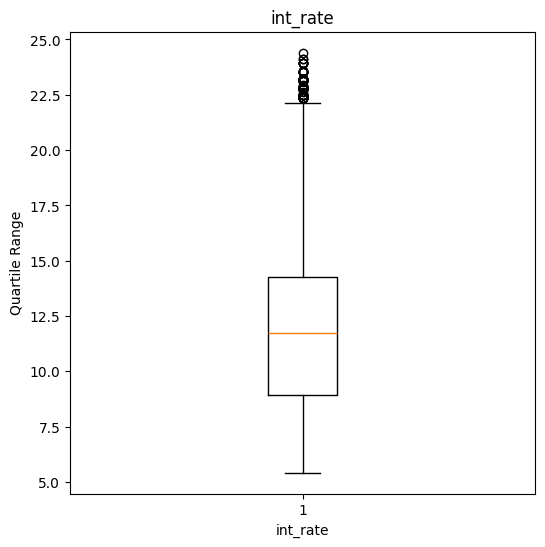

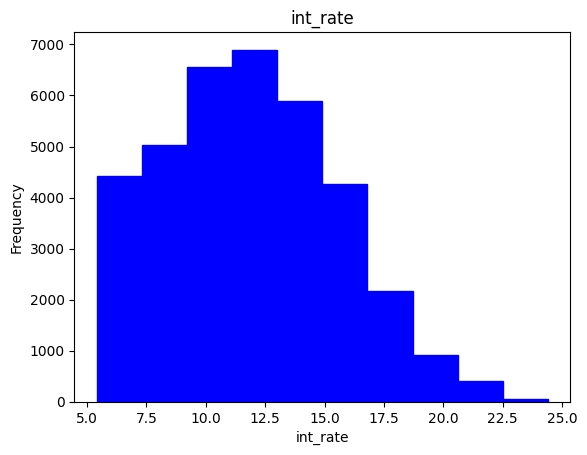

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64


In [47]:
# Univariate Analysis for int_rate
univ_cont_anlys('int_rate',color_v='b',bin=10)

##### Interest Rate Variable Insights
Maximum number of loan are in 4th bin of the interest rate (roughly between 11.75 and 14.25 interest rate)
<br>
There is no much outliers with bigger difference and hence no cleanup required

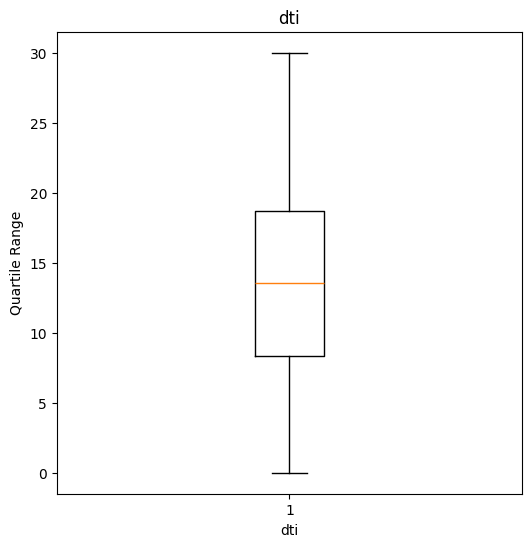

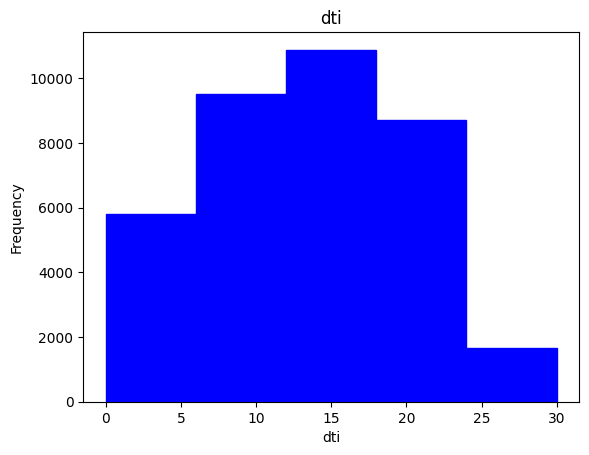

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64


In [48]:
# Univariate Analysis for dti
univ_cont_anlys('dti',color_v='b',bin=5)

##### dti Variable Insights
Maximum number of loan are in 3rd bin of the dti (roughly between 12 to 18) and they are moderate risky clients
<br>
There is no much outliers with bigger difference and hence no cleanup required

In [49]:
# # Univariate Analysis for revol_util
# univ_cont_anlys('revol_util',color_v='b',bin=25)

##### revol_util Variable Insights
There is no major difference in the utilization of revolving credit across the bins except 1st bin.
<br>
At the same time there are good number of users utilizing the maximum credit which could be risky.
<br>
There is no much outliers with bigger difference and hence no cleanup required

In [50]:
# Univariate Analysis for pub_rec. Print Value counts
lend_data['pub_rec'].value_counts()

pub_rec
0    34589
1     1963
2       46
3        6
4        2
Name: count, dtype: int64

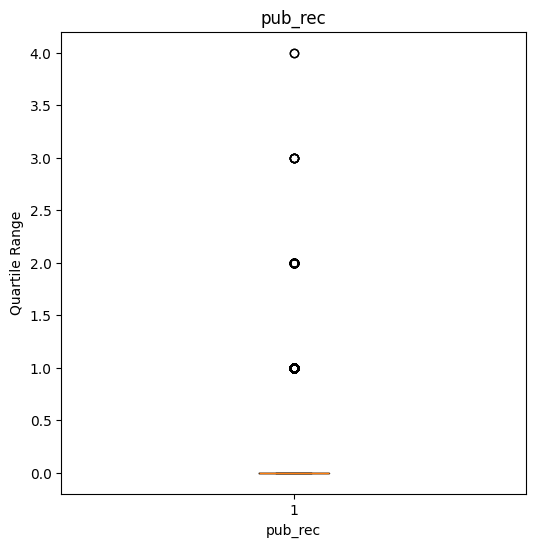

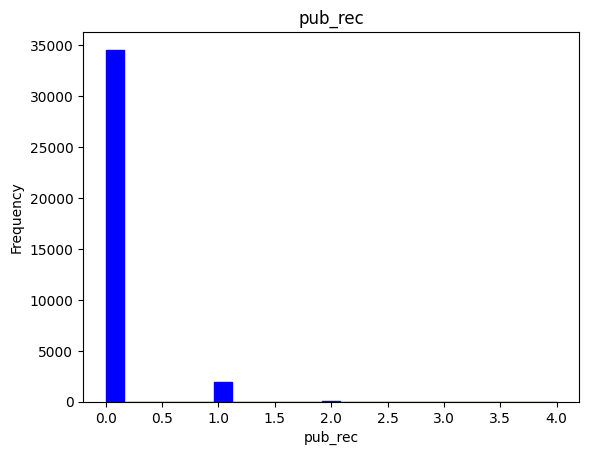

count    36606.000000
mean         0.056849
std          0.240355
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


In [51]:
univ_cont_anlys('pub_rec',color_v='b',bin=25)

In [52]:
#Find the % of applicants who has derogatory public records
round(lend_data[lend_data['pub_rec']!=0].count()[0]/lend_data['pub_rec'].count()*100,2)

5.51

##### pub_rec Variable Insights 
There are around 5.5% of loan applicants who has derogatory public records and they are risky applicants

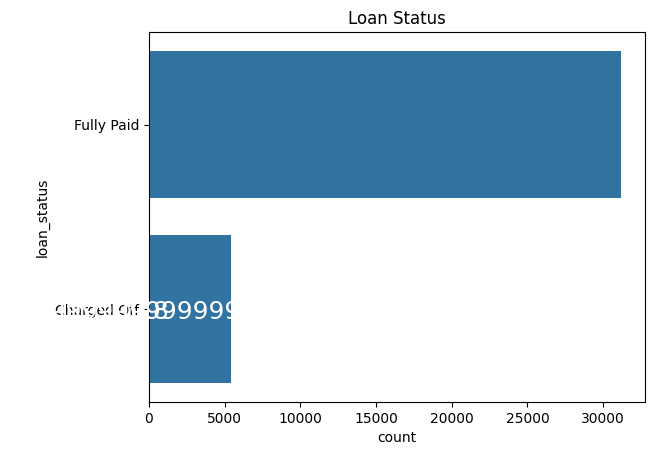

In [53]:
#Analyze loan status variable

ax=sns.countplot(lend_data['loan_status'])# count plot loan status

#Display the count in the chart
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title("Loan Status")
plt.show()

##### Loan Status Insights
5402 applicats are charged off.

For below analysis we will consider only Charged off data

## Bivariate analysis

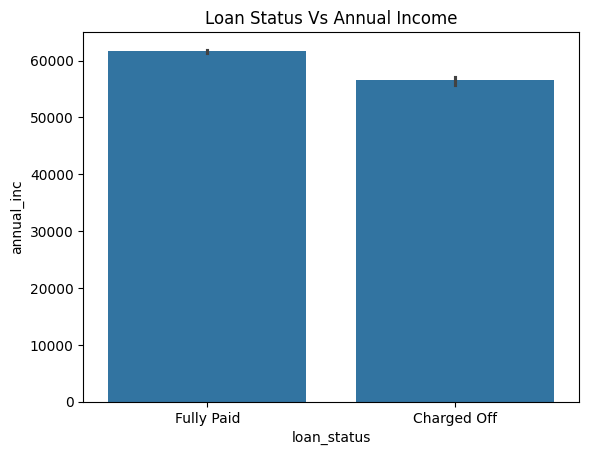

In [54]:
#Draw bar plot for Loan Status Vs Annual Income
sns.barplot(data=lend_data, x="loan_status", y="annual_inc")
plt.title("Loan Status Vs Annual Income")
plt.show()

#### Loan Status Vs Annual Income Insights
If annual income is less, charge-off probability is more

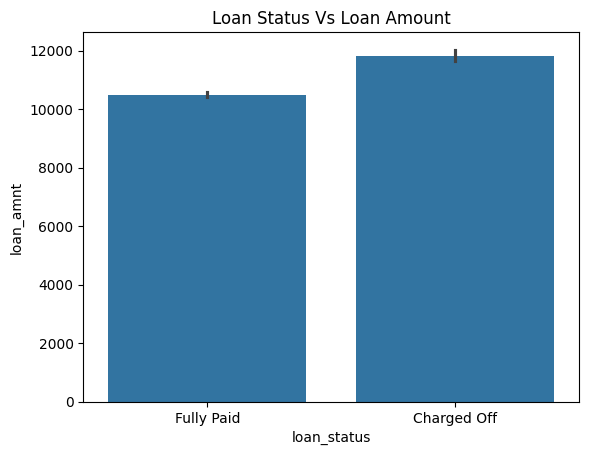

In [55]:
#Draw bar plot for Loan Status Vs Loan Amount
sns.barplot(data=lend_data, x="loan_status", y="loan_amnt")
plt.title("Loan Status Vs Loan Amount")
plt.show()

#### Loan Status Vs Loan Amount Insights
If Loan amount is more than 10K, pobability of Charged-off is more

In [56]:
#Create new data frame only with charged off accounts
lend_data_co=lend_data[lend_data.loan_status == 'Charged Off']

In [57]:
lend_data_co.shape

(5402, 26)

Extract subgrades numbers from the sub_grade variables and plot graph

In [58]:
lend_data_co["sub_grade_number"] = pd.to_numeric(lend_data.sub_grade.apply(lambda x : x[-1]))

In [59]:
print("Grade Value Counts")
print(lend_data_co.grade.value_counts())
print("\n Sub-Grade Value Counts")
print(lend_data_co.sub_grade_number.value_counts())

Grade Value Counts
grade
B    1376
C    1321
D    1077
E     656
A     593
F     286
G      93
Name: count, dtype: int64

 Sub-Grade Value Counts
sub_grade_number
5    1122
3    1115
2    1104
4    1083
1     978
Name: count, dtype: int64


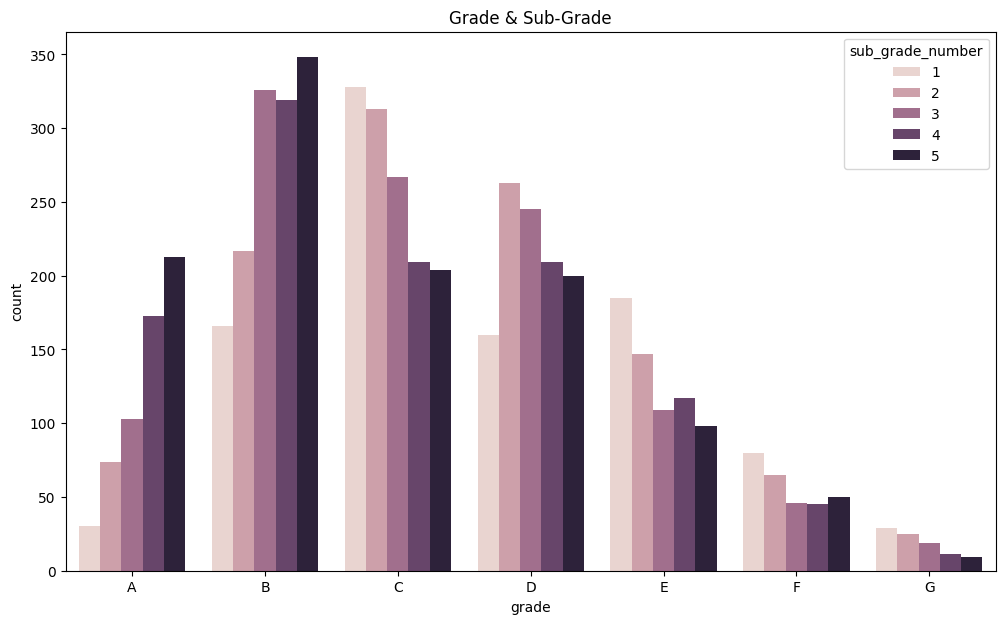

In [60]:
#Plot the count plot with grades and subgrades in hue for charged account data
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_number',data = lend_data_co)
plt.title("Grade & Sub-Grade")
plt.show()

##### Grade and Sub-Grade Insights
Highest number of defaulters are in Grade B irrespective of sub-grades
<br>
Highest number of defaulters are sub-Grade B-5

In [61]:
#Analyze home_ownership variable. find value counts
lend_data_co["home_ownership"].value_counts()

home_ownership
RENT        2763
MORTGAGE    2190
OWN          432
OTHER         17
Name: count, dtype: int64

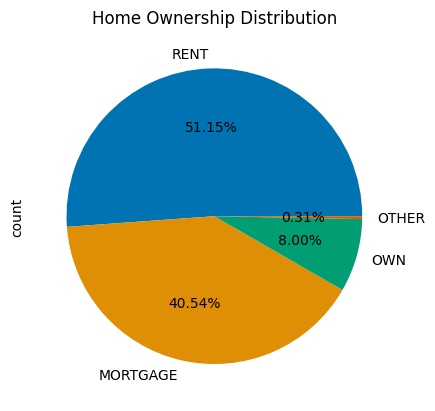

In [62]:
#Plot the pie chart for home ownership and display % of loan applicants spreaded in each category
lend_data_co['home_ownership'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title("Home Ownership Distribution")
plt.show()

##### Home Ownership Insights
Rented home clients are more risker than all.
<br>
Mortgage ownership clients are also almost equally risky to Rented home clients. 
<br>
So, Rent and Mortgage home ownership clients are more risky in compare to other categories

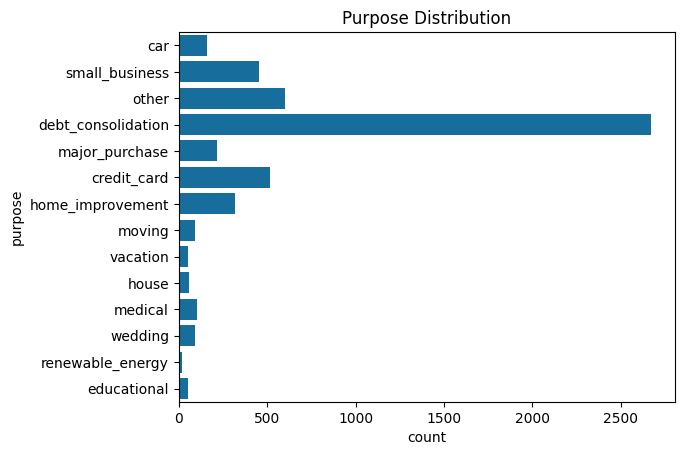

In [63]:
#Count plot on purpose variable
sns.countplot(y = 'purpose',data = lend_data_co)
plt.title("Purpose Distribution")
plt.show()

##### Purpose of Loan Insights
Clients who bought loans for Debt-Consolidation purpose are more defaulters

We will create bins (segment) on requried numeric variables and use as categorical variable for analysis

In [64]:
print(lend_data_co["loan_amnt"].describe())

count     5402.000000
mean     11831.307849
std       7885.005738
min        900.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [65]:
#Create 5 bins with below mentioned range on loan_amnt
lend_data_co['loan_amnt_grp'] = pd.cut(lend_data_co['loan_amnt'], bins=[0,7000,14000,21000,28000,35000],precision =0,labels=['0-7K','7K-14K','14K-21K','21K-28K','28K-35K'])

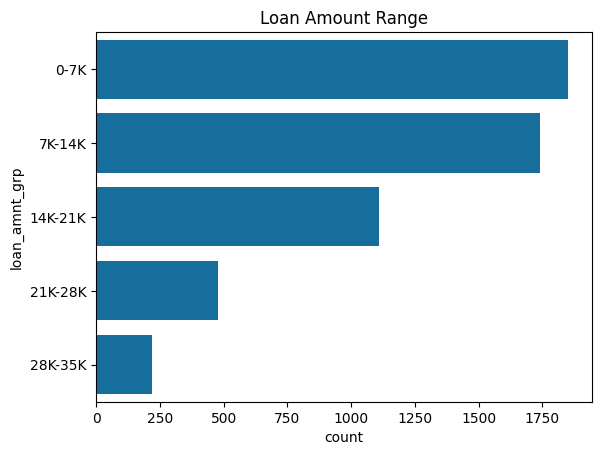

In [66]:
#Plot count graph on loan segment
sns.countplot(lend_data_co['loan_amnt_grp'])
plt.title("Loan Amount Range")
plt.show()

##### Loan Amount Insights for Charged Off Accounts
The loan amount range between 0 and 7000 has highest number of defaulters.
<br>
The loan amount range between 7000 and 14000 also has similar number of defaulters.

In [67]:
print(lend_data_co["int_rate"].describe())


count    5402.000000
mean       13.750241
std         3.630162
min         5.420000
25%        11.230000
50%        13.490000
75%        16.320000
max        24.400000
Name: int_rate, dtype: float64


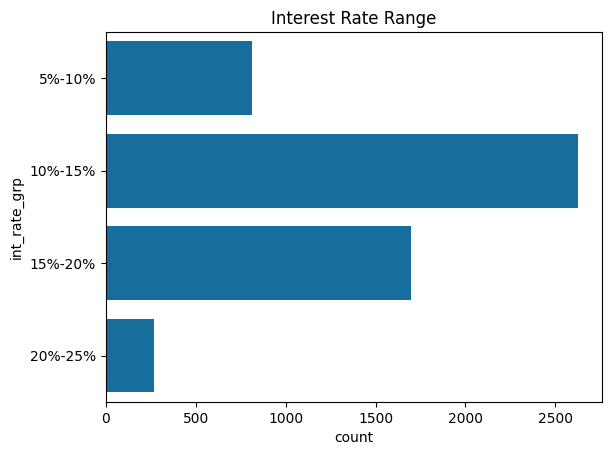

In [68]:
#Create 4 bins with below mentioned range on int_rate and plot count graph on int_rate segments
lend_data_co['int_rate_grp'] = pd.cut(lend_data_co['int_rate'], bins=[5,10,15,20,25],precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
sns.countplot(lend_data_co['int_rate_grp'])
plt.title("Interest Rate Range")
plt.show()

##### Interest Rate Insights for Charged Off Accounts
The interest rate range between 10% and 15% has highest number of defaulters.

In [69]:
print(lend_data_co["annual_inc"].describe())

count      5402.000000
mean      56512.293615
std       26574.695198
min        4080.000000
25%       36400.000000
50%       51996.000000
75%       71810.000000
max      140004.000000
Name: annual_inc, dtype: float64


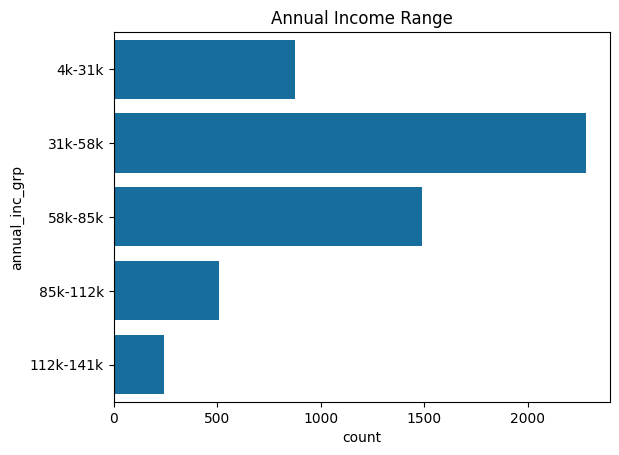

In [70]:
#Create 5 bins with below mentioned range on annual_inc and plot count graph on annual_inc segments
lend_data_co['annual_inc_grp'] = pd.cut(lend_data_co['annual_inc'], bins=[4000,31000,58000,85000,112000,141000],precision =0,labels =['4k-31k','31k-58k','58k-85k','85k-112k','112k-141k'])
sns.countplot(lend_data_co['annual_inc_grp'])
plt.title("Annual Income Range")
plt.show()

##### Annual Income Insights for Charged Off Accounts
The clients whose annual income is in the range of 31K to 58K are having highest defaulters

In [71]:
print(lend_data_co["installment"].describe())

count    5402.000000
mean      328.404472
std       210.612656
min        22.790000
25%       167.340000
50%       287.195000
75%       442.345000
max      1305.190000
Name: installment, dtype: float64


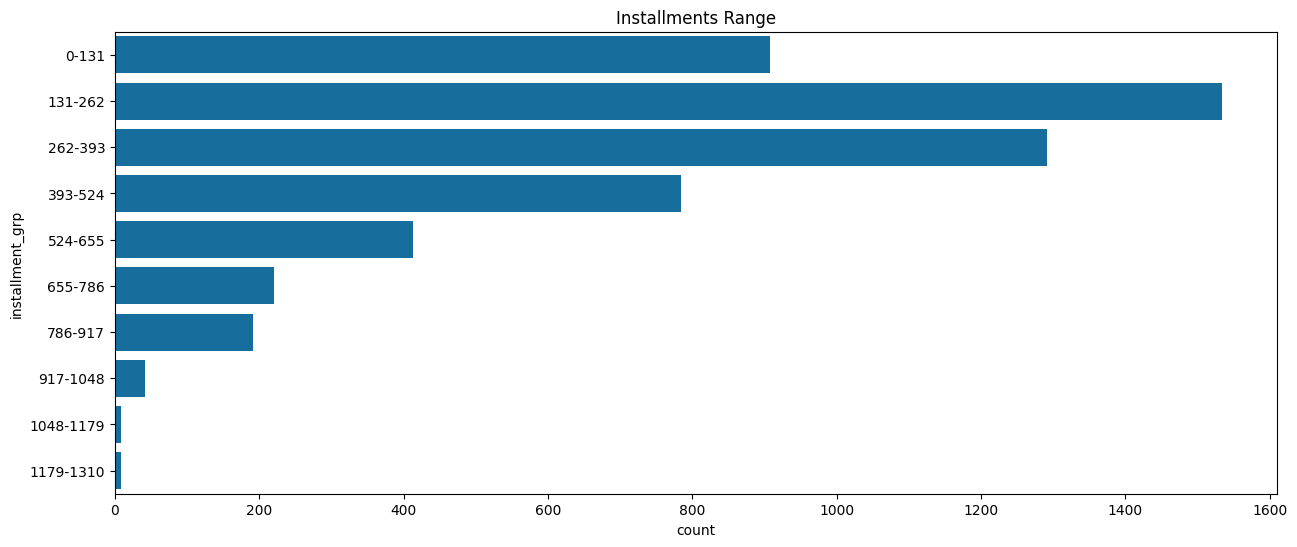

In [72]:
#Create 10 bins with below mentioned range on installment and plot count graph on installment segments
lend_data_co['installment_grp'] = pd.cut(lend_data_co['installment'], bins=[0,131,262,393,524,655,786,917,1048,1179,1310],  precision =0,labels=['0-131','131-262','262-393','393-524','524-655','655-786','786-917','917-1048','1048-1179','1179-1310'])
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(lend_data_co['installment_grp'])
plt.title("Installments Range")
plt.show()

##### Installments Insights for Charged Off Accounts
The clients whose installments are between 131-262 are having highest defaulters

In [73]:
print(lend_data_co["funded_amnt_inv"].describe())

count     5402.000000
mean     10640.978165
std       7463.483791
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14999.997558
max      35000.000000
Name: funded_amnt_inv, dtype: float64


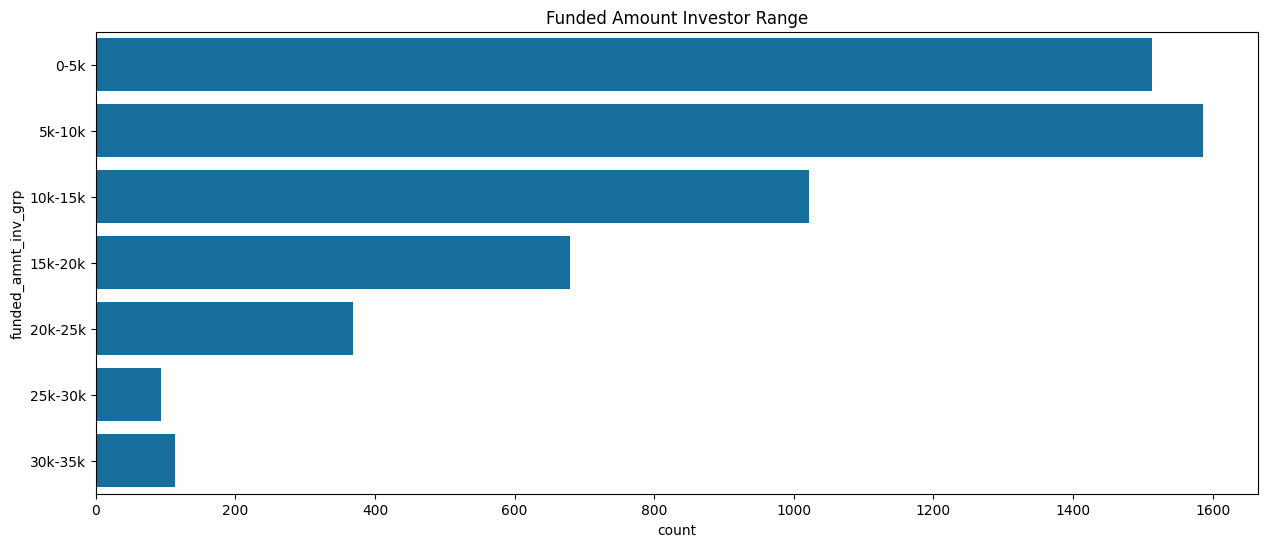

In [74]:
#Create 7 bins with below mentioned range on funded_amnt_inv_grp and plot count graph on funded_amnt_grp segments
lend_data_co['funded_amnt_inv_grp'] = pd.cut(lend_data_co['funded_amnt_inv'], bins=[0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(lend_data_co['funded_amnt_inv_grp'])
plt.title("Funded Amount Investor Range")
plt.show()

#### Funded Amount by Investor Insights for Charged Off Accounts
The clients whose funded amount by investor is in the range of 5K to 10K are having highest defaulters

In [75]:
print(lend_data_co["dti"].describe())

count    5402.000000
mean       14.110500
std         6.586738
min         0.000000
25%         9.180000
50%        14.420000
75%        19.410000
max        29.850000
Name: dti, dtype: float64


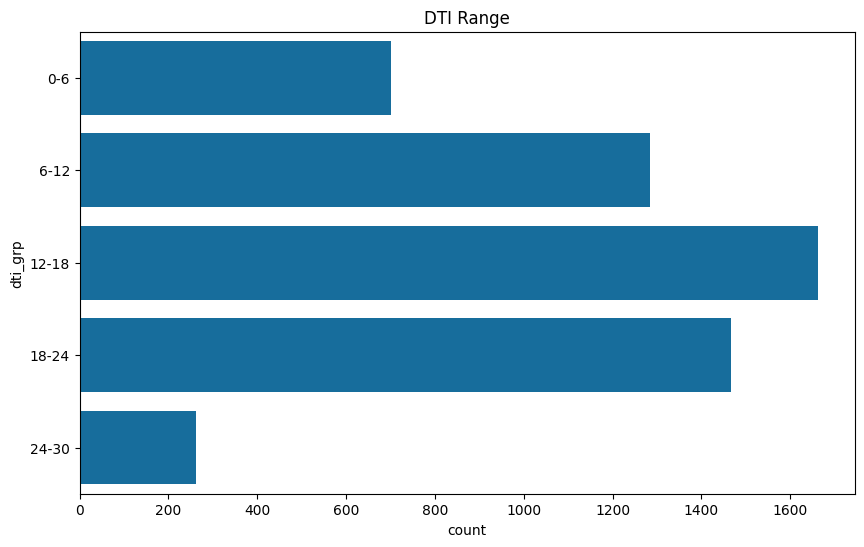

In [76]:
#Create 5 bins with below mentioned range on dti_grp and plot count graph on dti_grp segments
lend_data_co['dti_grp'] = pd.cut(lend_data_co['dti'], bins=[0,6,12,18,24,30],precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot(lend_data_co['dti_grp'])
plt.title("DTI Range")
plt.show()

##### DTI Insights for Charged Off Accounts
The clients whose DTI is in the range of 12-18 are having highest defaulters

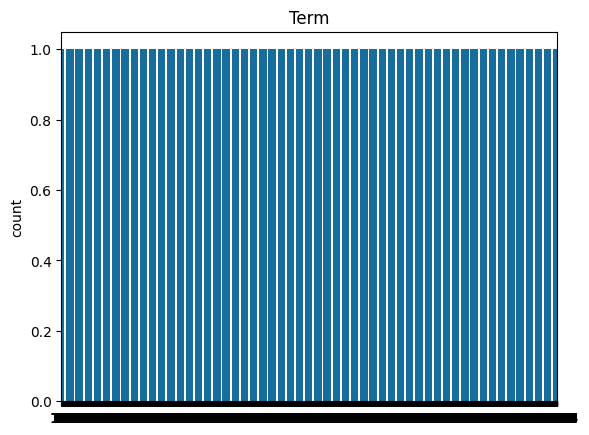

In [77]:
#Count plot term
sns.countplot(lend_data_co["term"])
plt.title("Term")
plt.show()

##### Term Insights for Charged Off Accounts
The clients who took loan tenure of 36 months are having highest number of defaulters

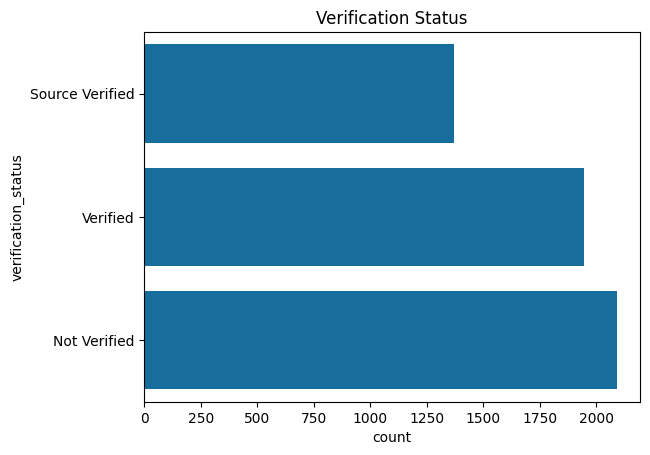

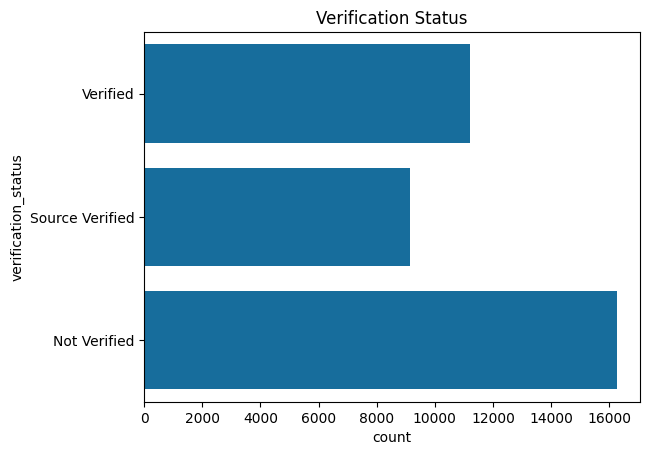

In [78]:
#Count plot on verification_status
sns.countplot(lend_data_co["verification_status"])
plt.title("Verification Status")
plt.show()

sns.countplot(lend_data["verification_status"])
plt.title("Verification Status")
plt.show()

##### Verification Status Insights for Charged Off Accounts
Non-verified clients are having highest possibilities of defaulting


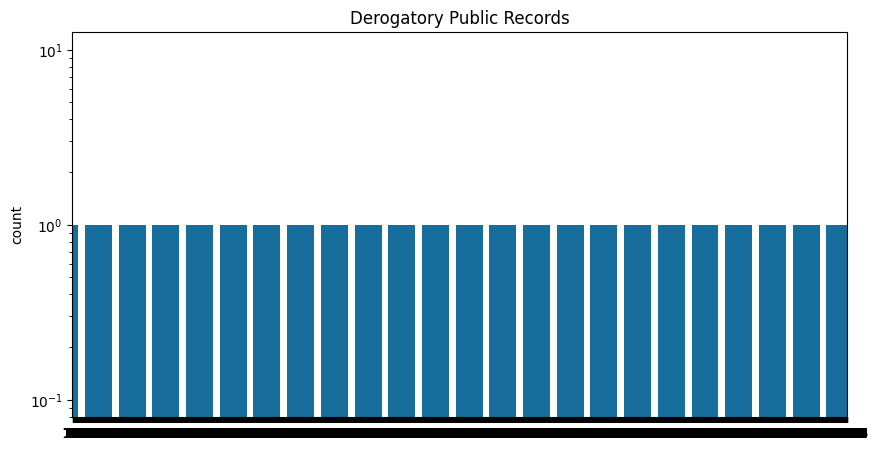

In [79]:
#Count plot on Derogatory Public Records values on log scale
fig,ax = plt.subplots(figsize = (10,5))
ax.set_yscale('log')
sns.countplot(lend_data_co["pub_rec"])
plt.title("Derogatory Public Records")
plt.show()

##### Derogatory Public Records Insights for Charged Off Accounts
Though with 0 derogatory public records, clients may fall under defaulters

#### Anlysing on Date Attributes

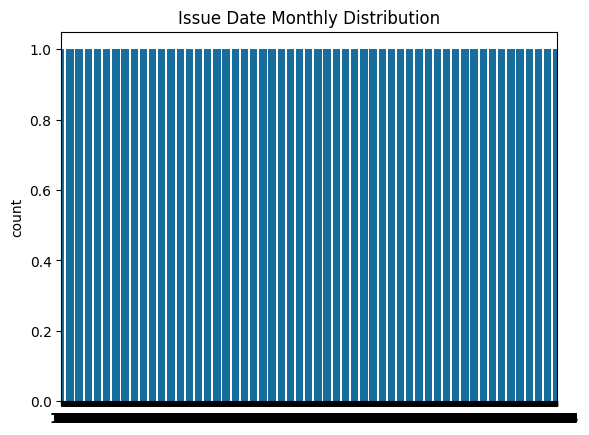

In [80]:
#Count plot on Issue Date Monthly Distribution
sns.countplot(lend_data_co["issue_date_month"])
plt.title("Issue Date Monthly Distribution")
plt.show()

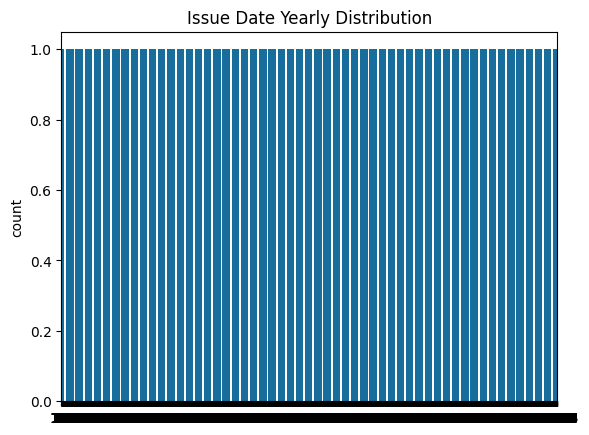

In [81]:
#Count plot on Issue Date Yearly Distribution
sns.countplot(lend_data_co["issue_date_year"])
plt.title("Issue Date Yearly Distribution")
plt.show()

##### Issue Date Insights for Charged Off Accounts
The loans which are issues in the month of Dec are more defaulted.
<br>
The loans which are issues in the year 2011 are more defaulted. It might be because of recession. 

### Lets analyze relationships of different variables
Bin the continuous variables in main data frame where both loan status are available.


In [82]:
#Bin annual_inc,int_rate,loan_amnt & dti variables in below given ranges
lend_data['annual_inc_grp'] = pd.cut(lend_data['annual_inc'], bins=[4000,31000,58000,85000,112000,141000],precision =0,labels =['4k-31k','31k-58k','58k-85k','85k-112k','112k-141k'])
lend_data['int_rate_grp'] = pd.cut(lend_data['int_rate'], bins=[5,10,15,20,25],precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
lend_data['loan_amnt_grp'] = pd.cut(lend_data['loan_amnt'], bins=[0,7000,14000,21000,28000,35000],precision =0,labels=['0-7K','7K-14K','14K-21K','21K-28K','28K-35K'])
lend_data['dti_grp'] = pd.cut(lend_data['dti'], bins=[0,6,12,18,24,30],precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

### Multivariate analysis

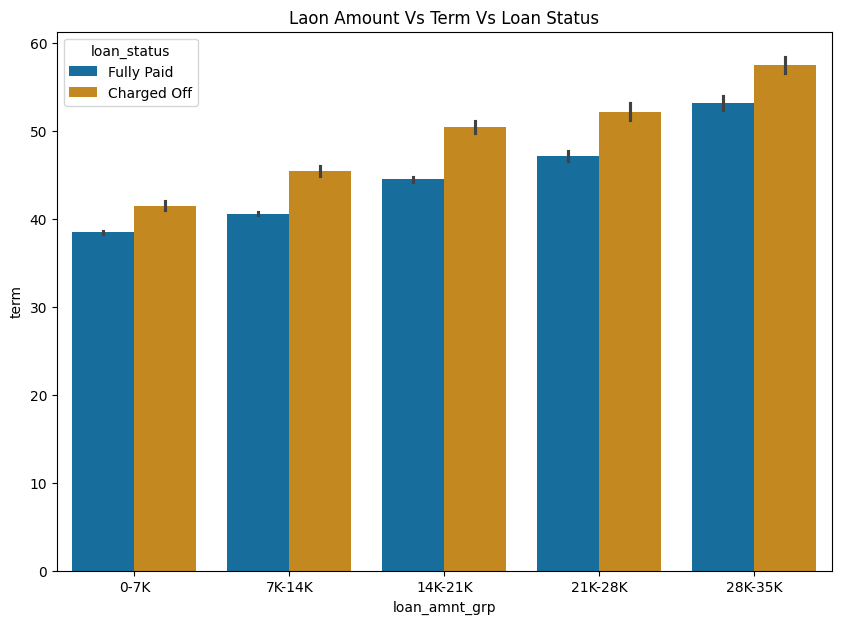

In [83]:
#Analysis of Loan Amount Vs Term wrt loan status
plt.figure(figsize=(10,7))
sns.barplot(data=lend_data, x='loan_amnt_grp', y='term',hue='loan_status') #Draw bar plot for given variables
plt.title("Laon Amount Vs Term Vs Loan Status")
plt.show()

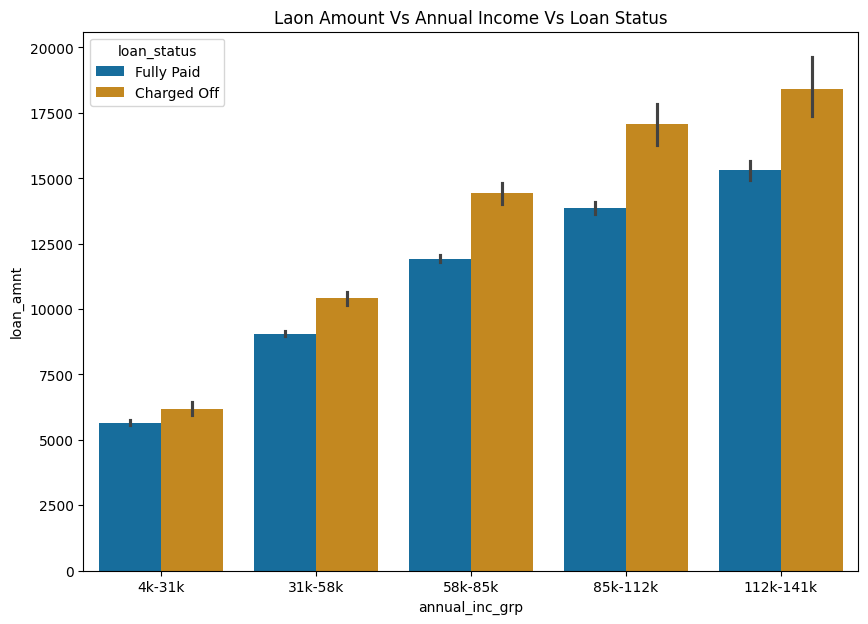

In [84]:
#Analysis of Loan Amount Vs Annual Income wrt loan status
plt.figure(figsize=(10,7))
sns.barplot(data=lend_data, x='annual_inc_grp', y='loan_amnt',hue='loan_status')
plt.title("Laon Amount Vs Annual Income Vs Loan Status")
plt.show()

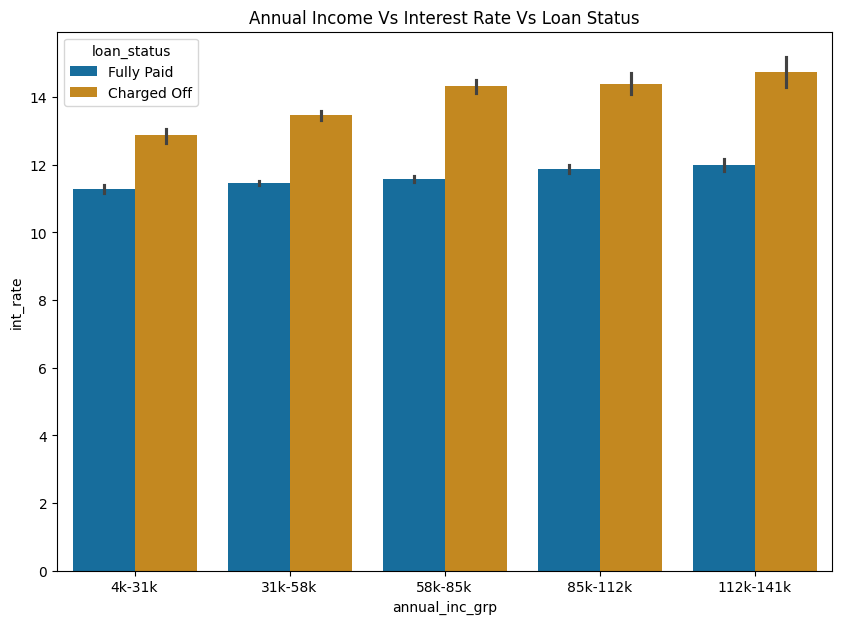

In [85]:
#Analysis of Annual Income Vs Interest Rate wrt loan status
plt.figure(figsize=(10,7))
sns.barplot(data=lend_data, x='annual_inc_grp', y='int_rate',hue='loan_status')
plt.title("Annual Income Vs Interest Rate Vs Loan Status")
plt.show()

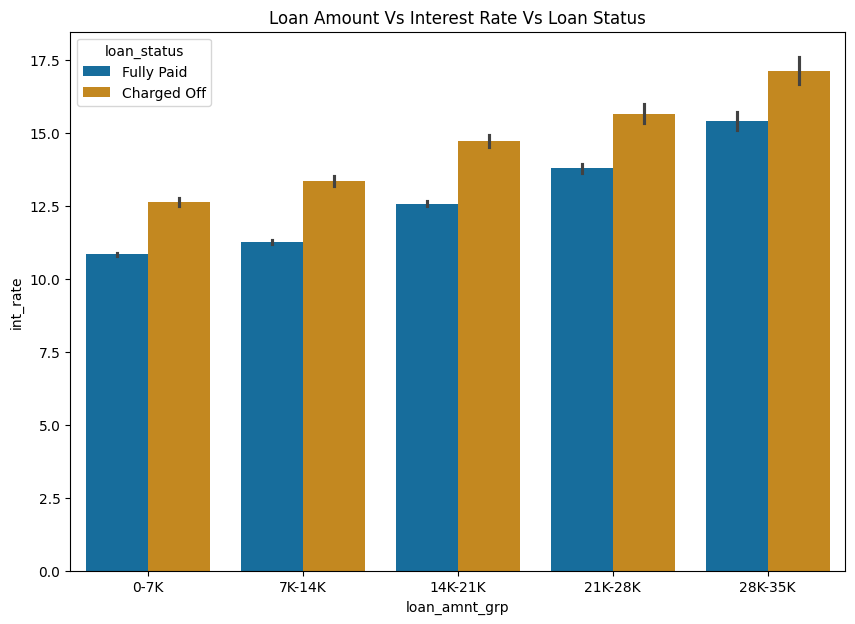

In [86]:
#Analysis of Loan Amount Vs Interest Rate wrt loan status
plt.figure(figsize=(10,7))
sns.barplot(data=lend_data, x='loan_amnt_grp', y='int_rate',hue='loan_status')
plt.title("Loan Amount Vs Interest Rate Vs Loan Status")
plt.show()

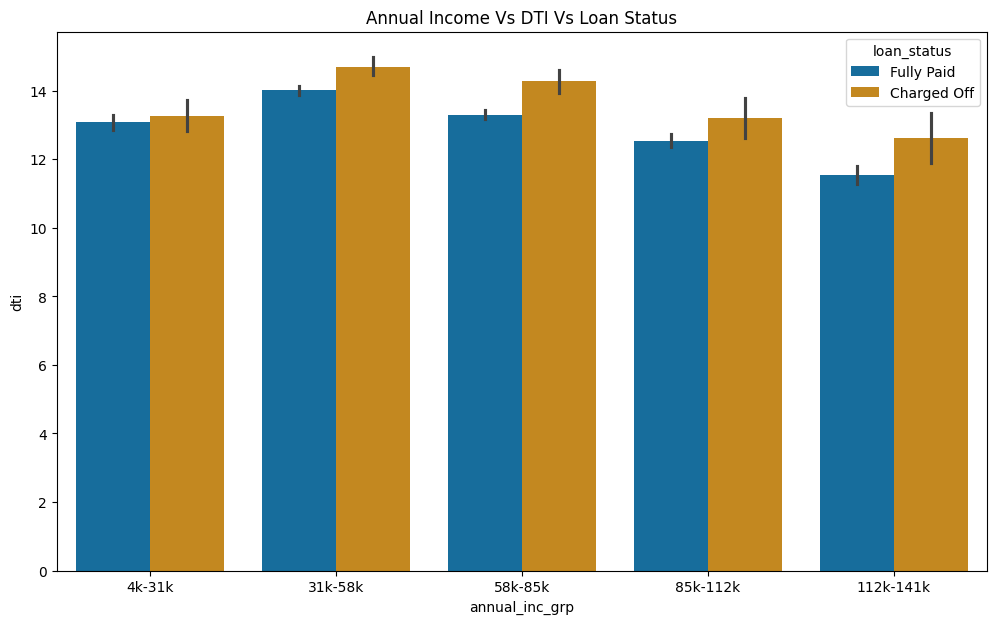

In [87]:
#Analysis of Annual Income Vs DTI wrt loan status
plt.figure(figsize=(12,7))
sns.barplot(data=lend_data, x='annual_inc_grp', y='dti',hue='loan_status')
plt.title("Annual Income Vs DTI Vs Loan Status")
plt.show()

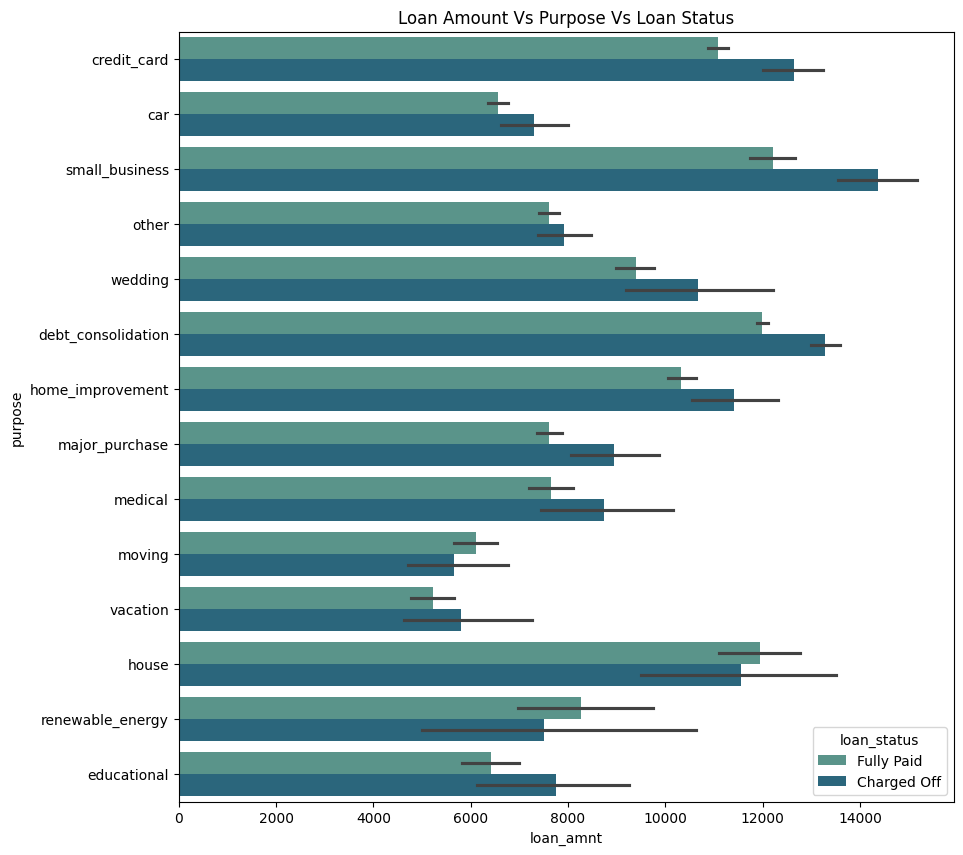

In [88]:
#Analysis of Loan Amount Vs Purpose wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="crest")

plt.title("Loan Amount Vs Purpose Vs Loan Status")
plt.show()

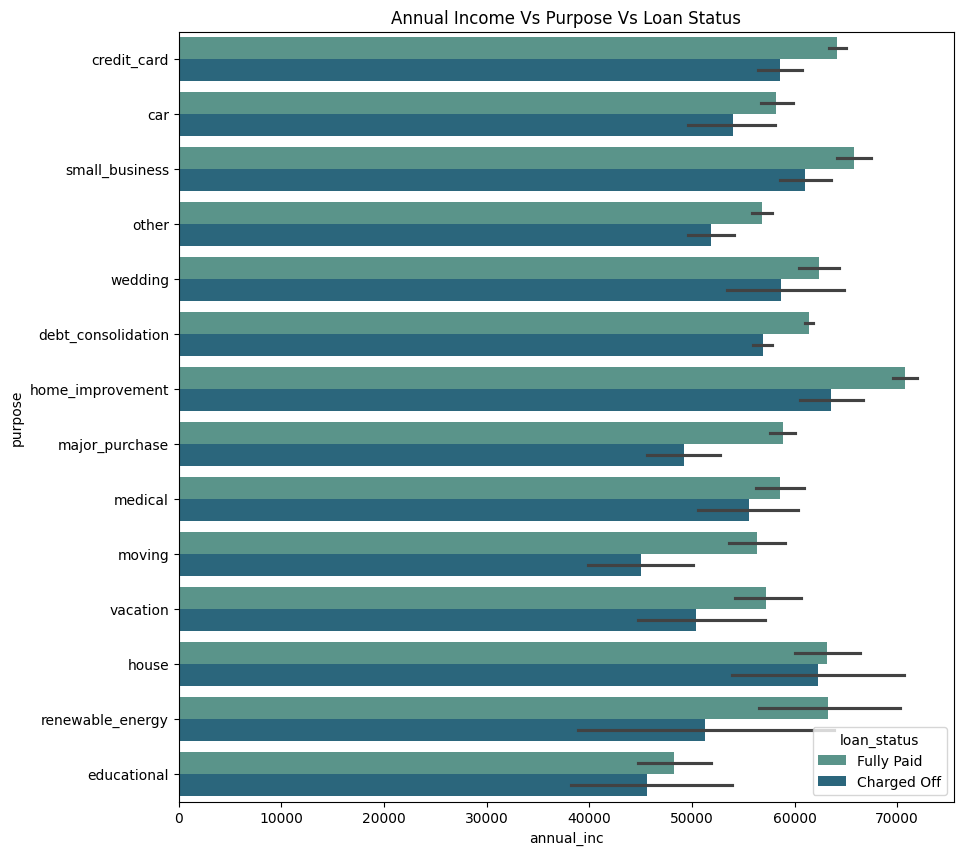

In [89]:
#Draw bar plot for analysis of Annual Income Vs Purpose wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='annual_inc', y='purpose', hue ='loan_status',palette="crest")
plt.title("Annual Income Vs Purpose Vs Loan Status")
plt.show()

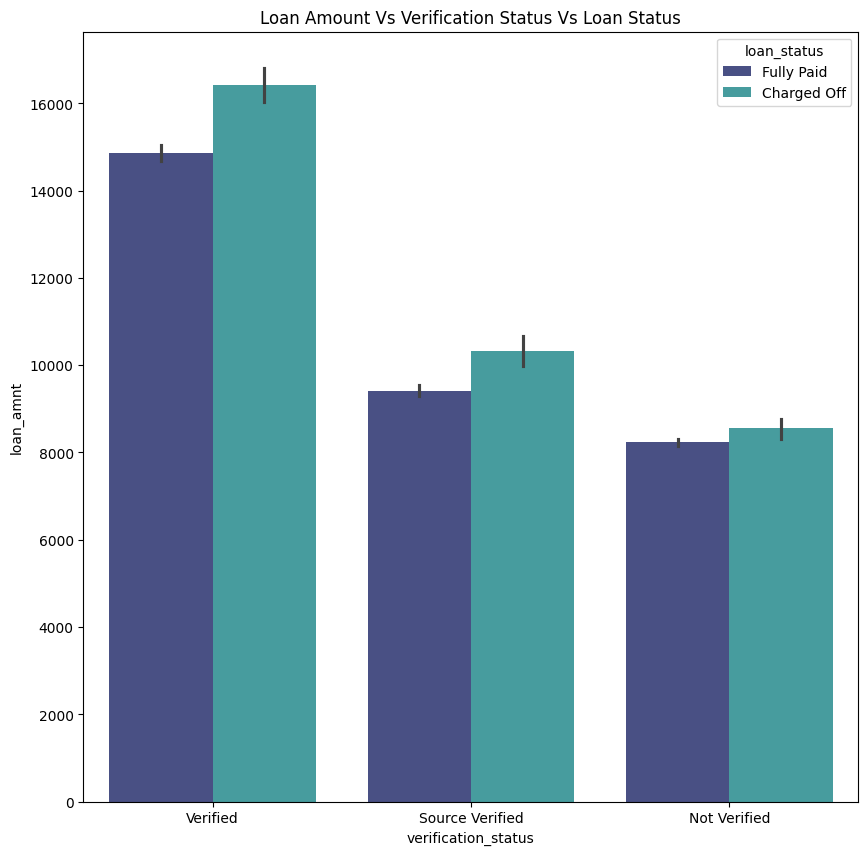

In [90]:
#Draw bar plot for analysis of Loan Amount Vs Verification Status wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='verification_status', y='loan_amnt',  hue ='loan_status',palette="mako")
plt.title("Loan Amount Vs Verification Status Vs Loan Status")
plt.show()

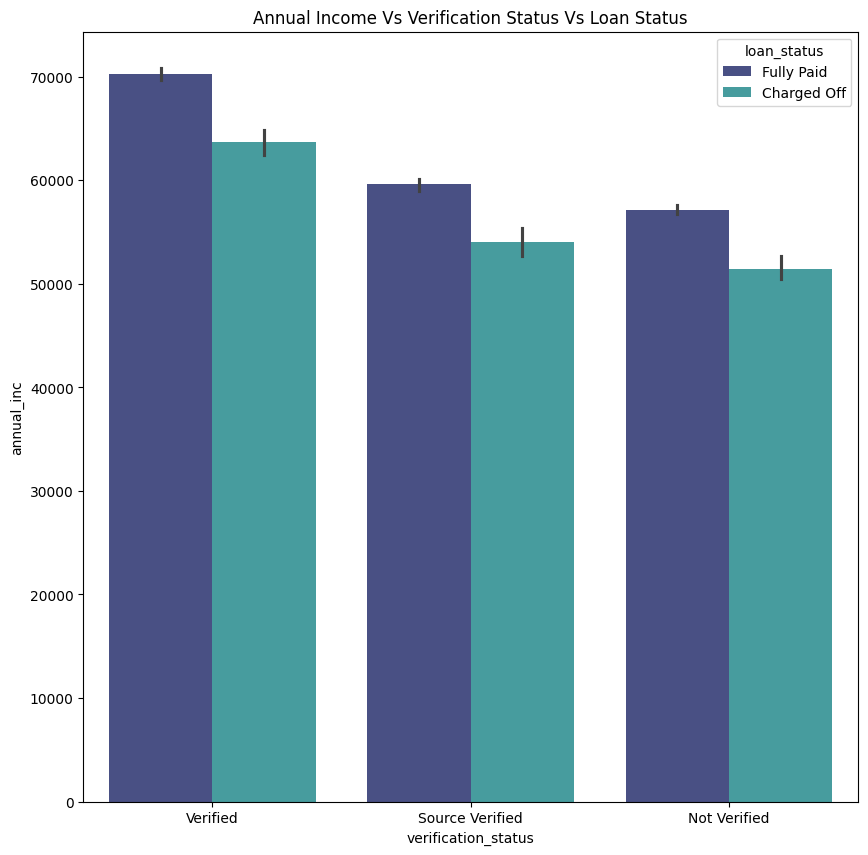

In [91]:
#Draw bar plot for analysis of Annual Income Vs Verification Status wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='verification_status',y='annual_inc',  hue ='loan_status',palette="mako")
plt.title("Annual Income Vs Verification Status Vs Loan Status")
plt.show()

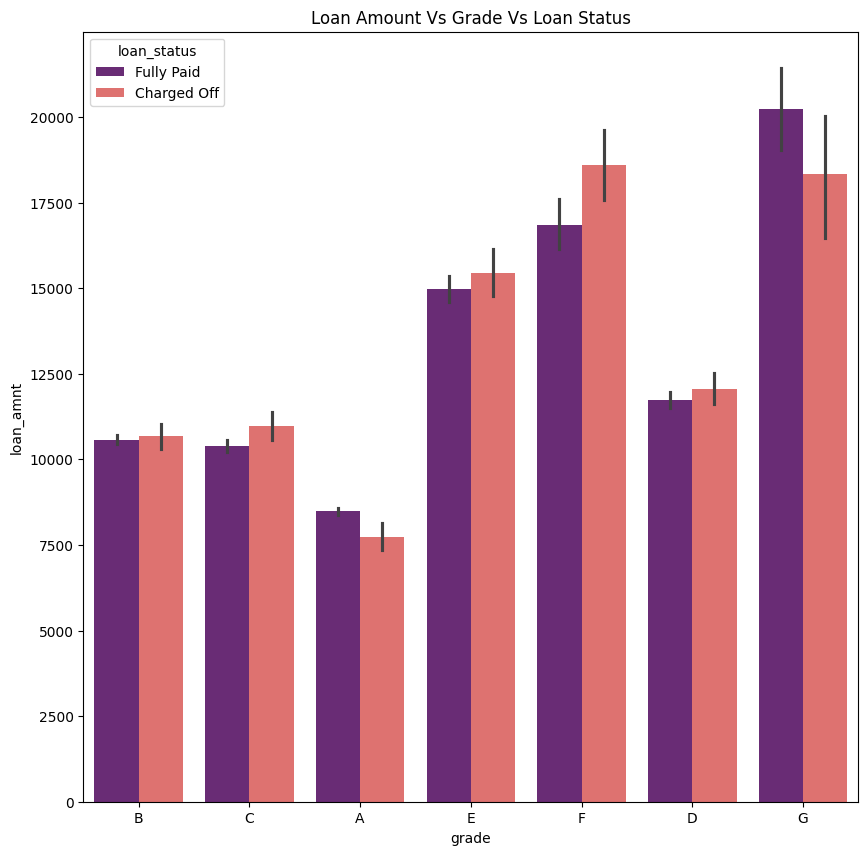

In [92]:
#Draw bar plot for analysis of Loan Amount Vs Grade wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='grade', y='loan_amnt', hue ='loan_status',palette="magma")
plt.title("Loan Amount Vs Grade Vs Loan Status")
plt.show()


In [93]:
#replacing 'NONE' with 'OTHER' in home ownership as there are only few records of None
lend_data['home_ownership']=lend_data['home_ownership'].str.replace('NONE','OTHER')

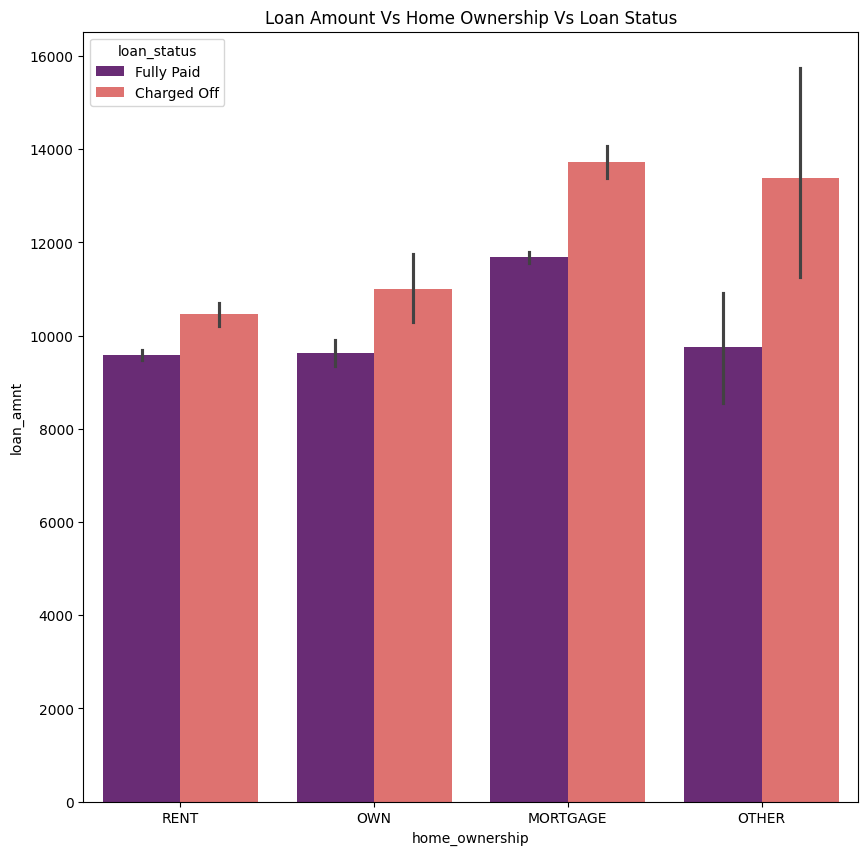

In [94]:
#Draw bar plot for analysis of Loan Amount Vs Home Ownership wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="magma")
plt.title("Loan Amount Vs Home Ownership Vs Loan Status")
plt.show()

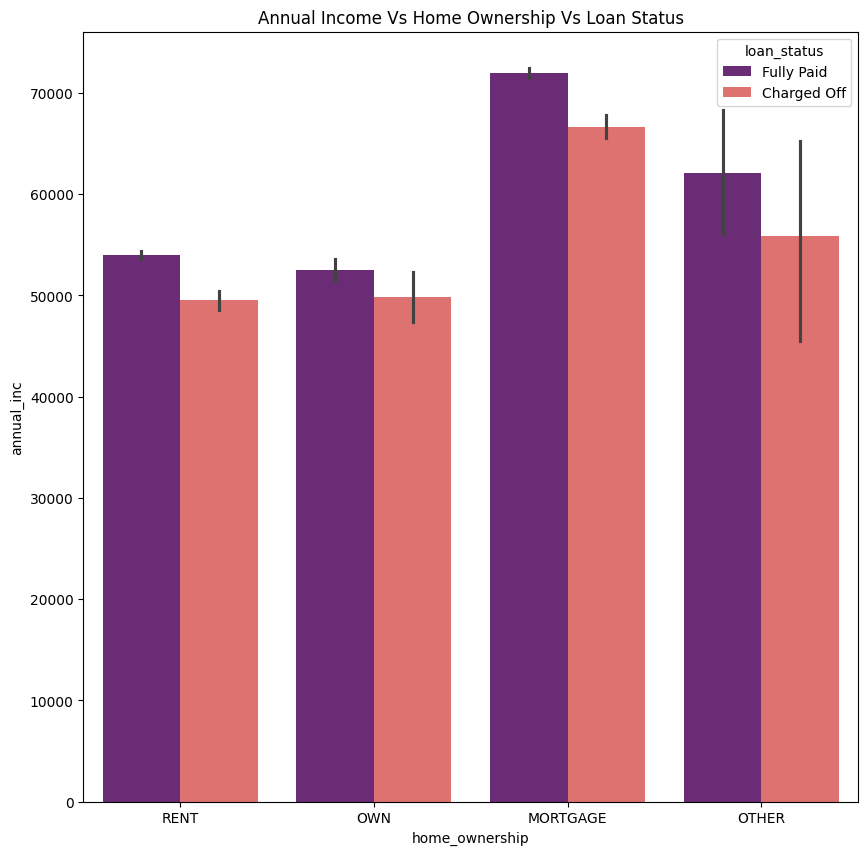

In [95]:
#Draw bar plot for analysis of Annual Income Vs Home Ownership wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="magma")
plt.title("Annual Income Vs Home Ownership Vs Loan Status")
plt.show()

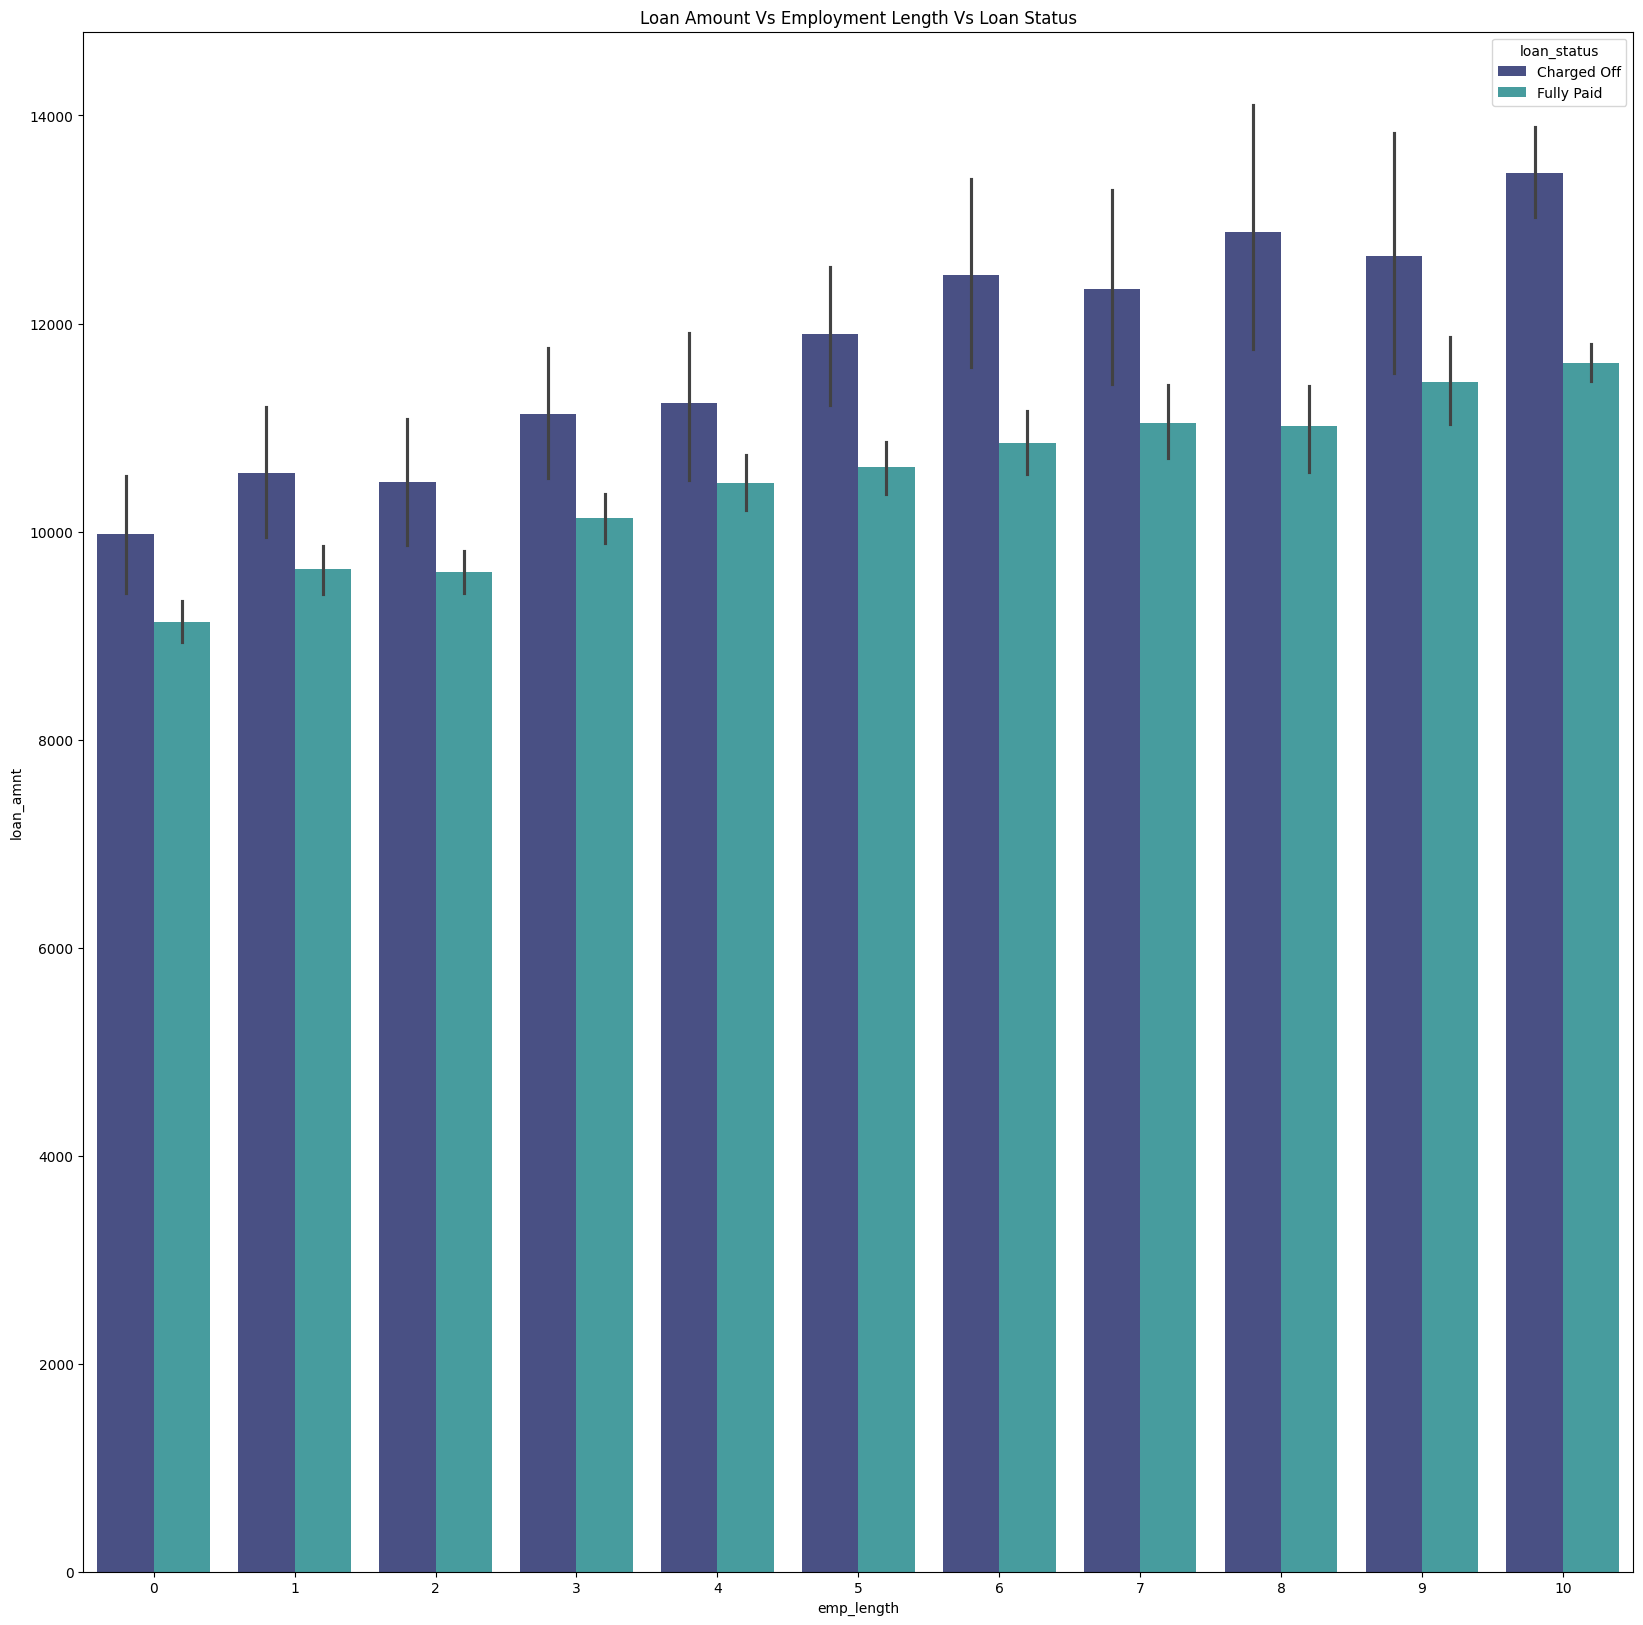

In [96]:
#Draw bar plot for analysis of Loan Amount Vs Employment Length wrt loan status
plt.figure(figsize=(20,20))
sns.barplot(data =lend_data,x='emp_length',y='loan_amnt',  hue ='loan_status',palette="mako")
plt.title("Loan Amount Vs Employment Length Vs Loan Status")
plt.show()

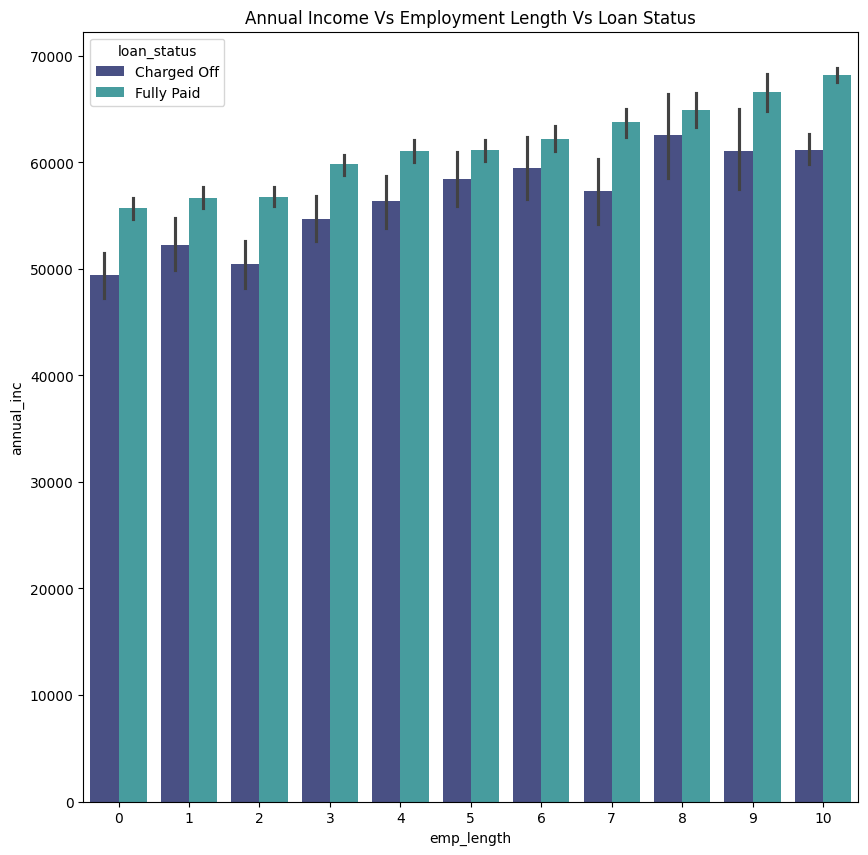

In [97]:
#Draw bar plot for analysis of Annual Income Vs Employment Length wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='emp_length', y='annual_inc',  hue ='loan_status',palette="mako")
plt.title("Annual Income Vs Employment Length Vs Loan Status")
plt.show()

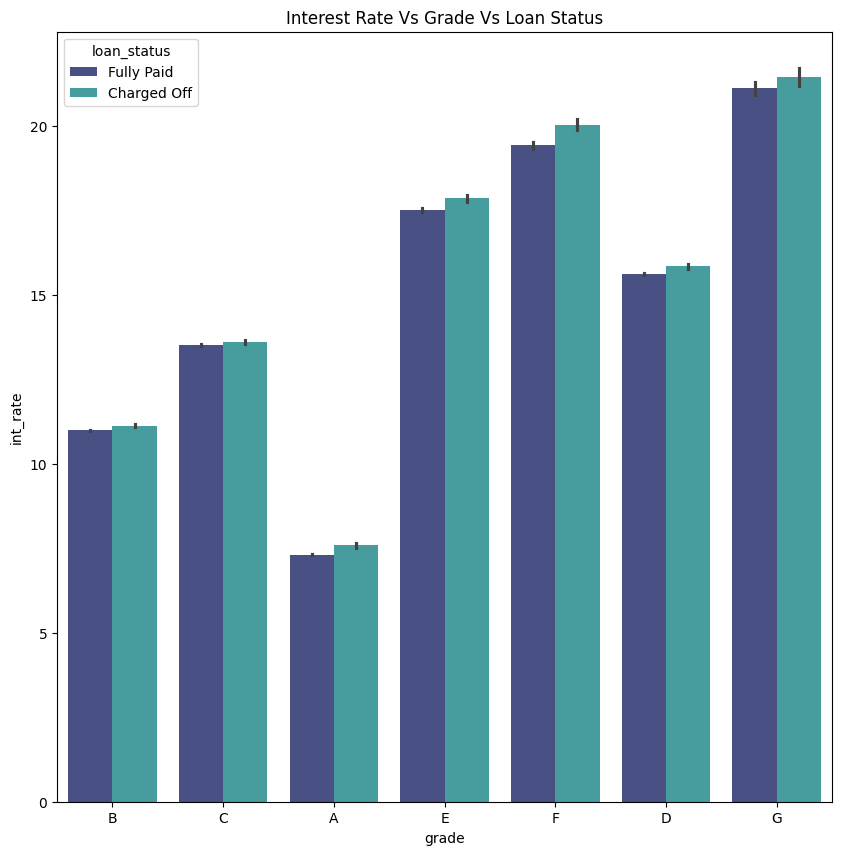

In [98]:
#Draw bar plot for analysis of Interest Rate and Grade wrt loan status
plt.figure(figsize=(10,10))
sns.barplot(data =lend_data,x='grade', y='int_rate',  hue ='loan_status',palette="mako")
plt.title("Interest Rate Vs Grade Vs Loan Status")
plt.show()

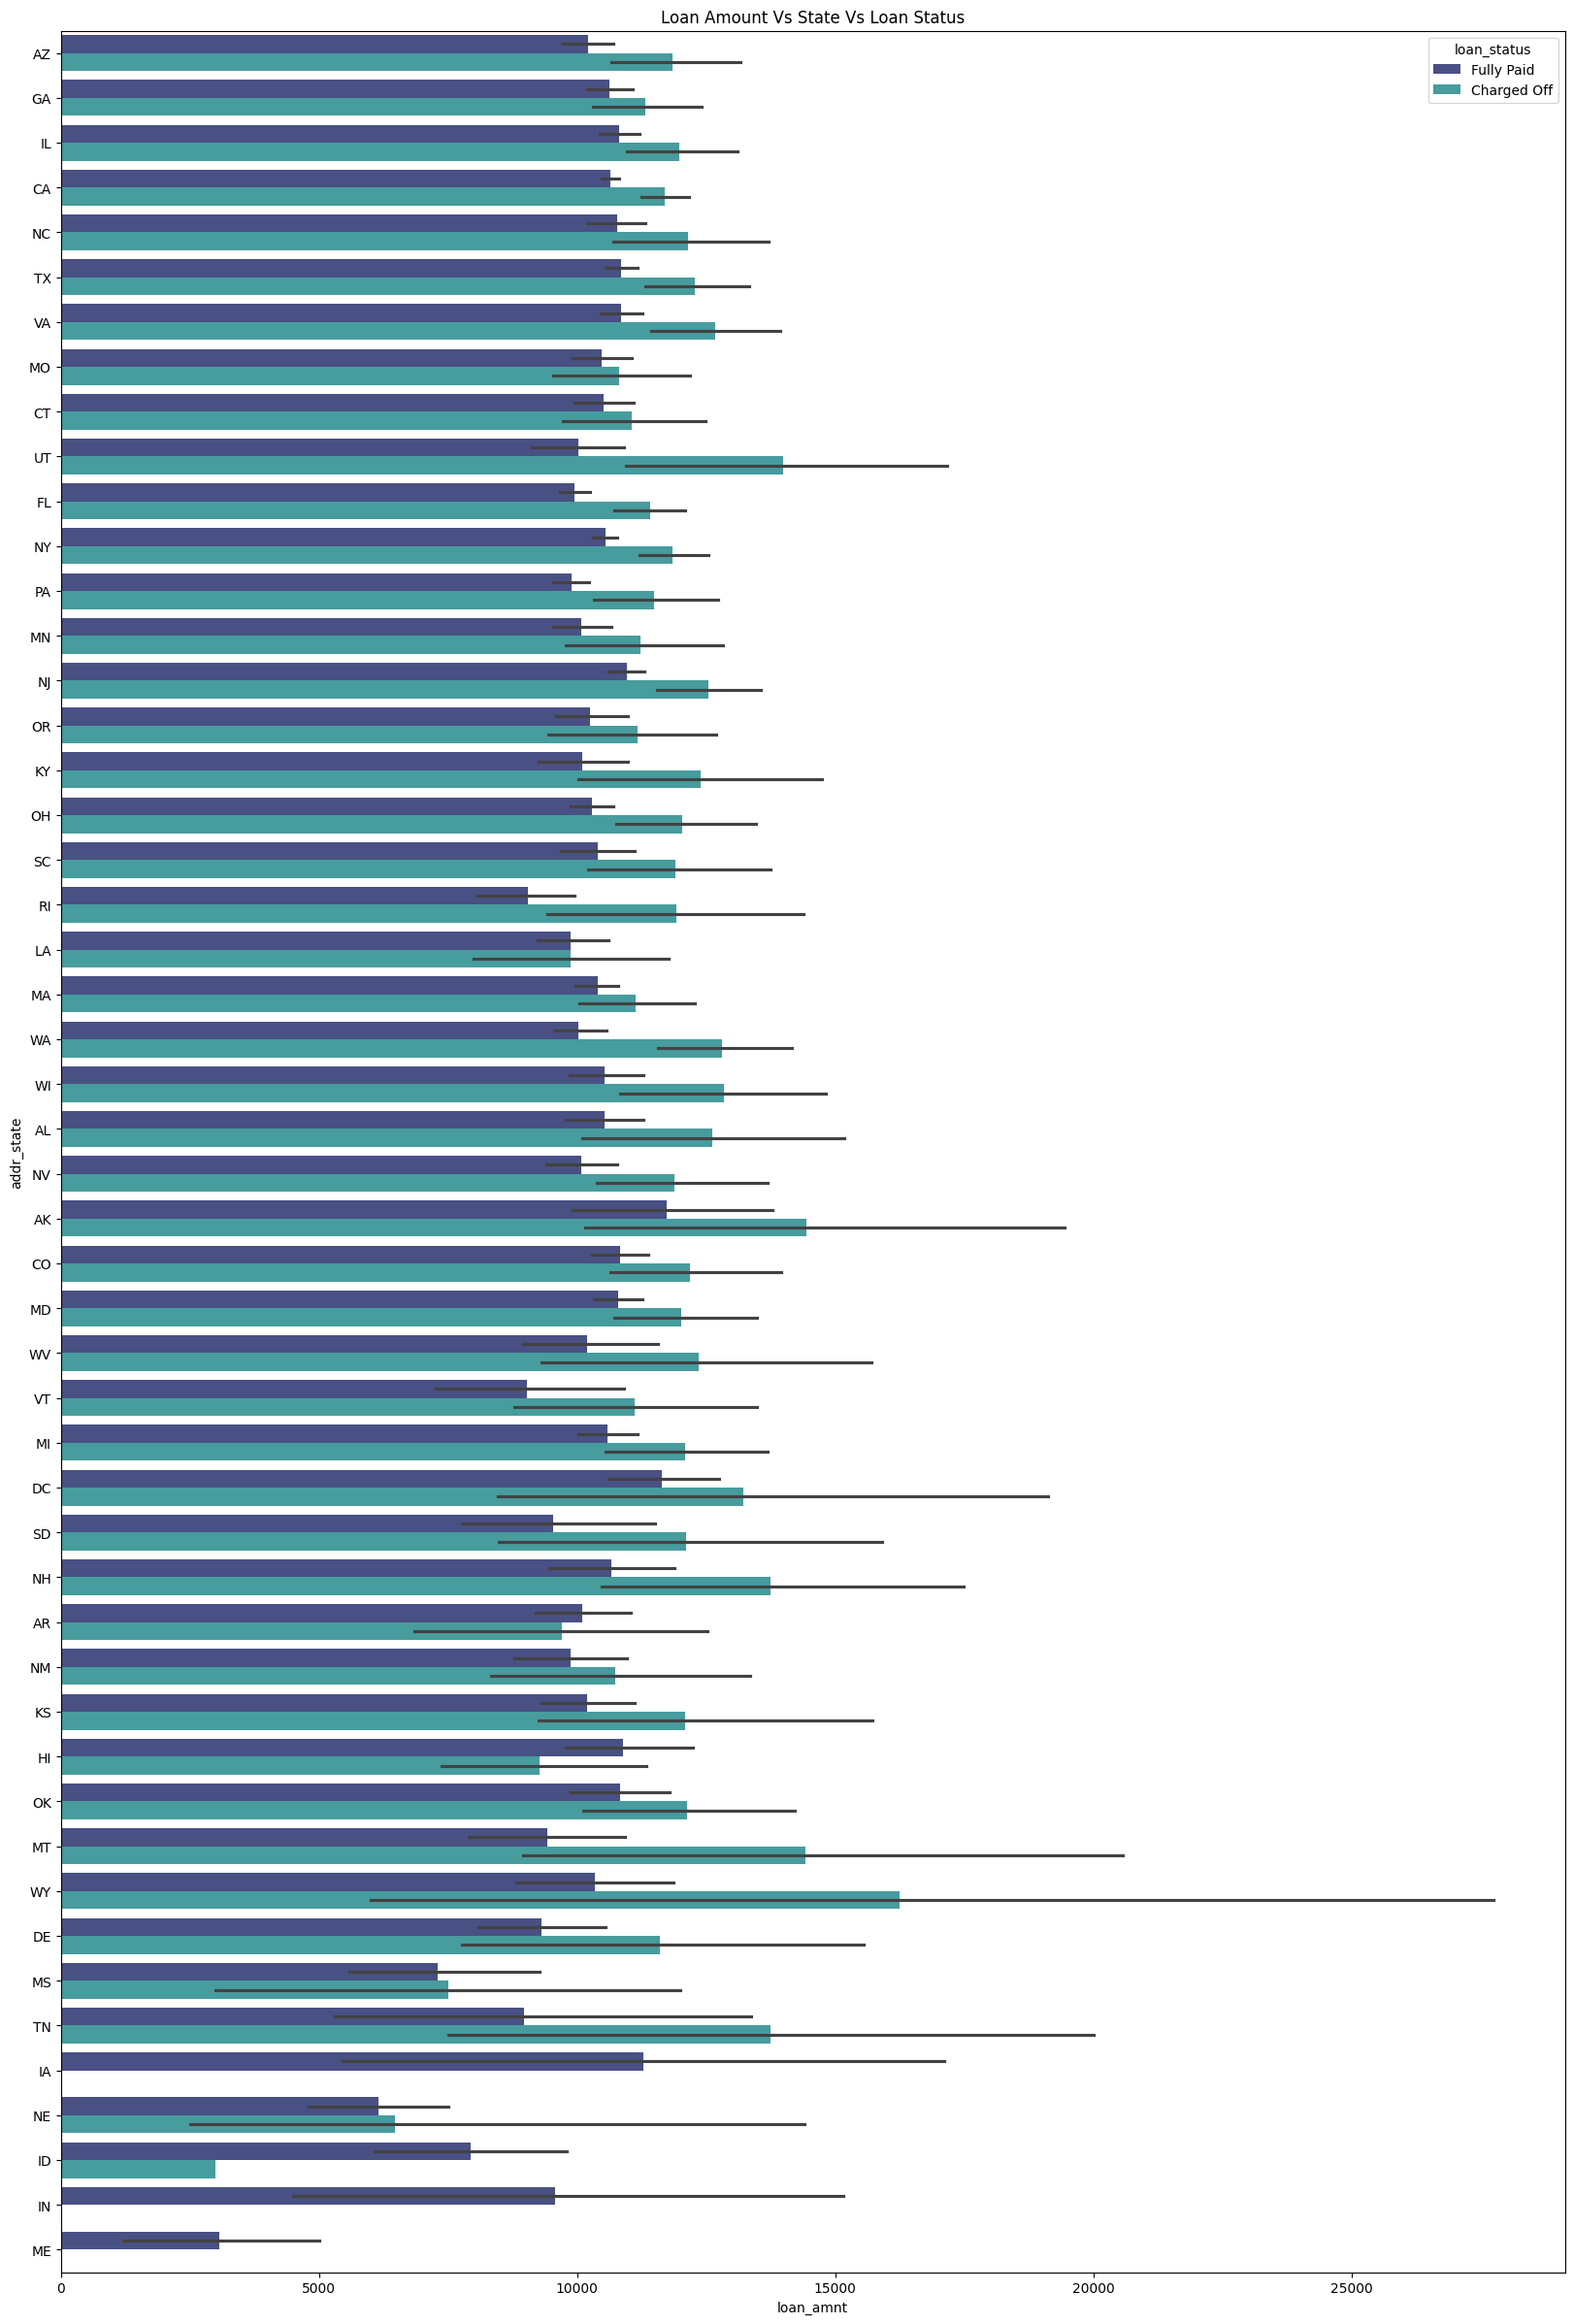

In [99]:
#Draw bar plot for analysis of Loan Amount and state wrt loan status
plt.figure(figsize=(20,30))
sns.barplot(data =lend_data,y='addr_state', x='loan_amnt', hue ='loan_status',palette="mako")
plt.title("Loan Amount Vs State Vs Loan Status")
plt.show()

##### Consolidated Insights of Variable Relationships wrt Loan Status
<br>
With this analysis, we can conclude that probability of defaulters could be because of below reasons.
<br>
1.	Client has loan amount in the range of 28000 to 35000 with term more than 50 months
<br>
2.	Client has annual income above 112k-141K with loan amount of more than 15K
<br>
3.	Client with rate of interest more than 11% irrespective of annual income
<br>
4.	Client with loan amount in the range of 28000 to 35000 with interest rate more than 15% 
<br>
5.	Client with annual income in the range of 31K to 58K with dti more than 14
<br>
6.	Clients requesting small business loans with loan amount above 14000
<br>
7.	Clients requesting home improvement loan with annual income of above 65000
<br>
8.	Verified loan account client requesting loan amount more than 15000 or annual income of above 60000
<br>
9.	Client with grade F & G and has loan amount more than 15000. This could be because of high interest rate and loan amount disposed
<br>
10.	Client whose home ownership is Mortgage or Others and has loan amount more than 12000
<br>
11.	Client whose home ownership is Mortgage and has annual income above 60000
<br>
12.	More the employment experience, loan amount keeps increasing and defaulters are also high in all experience level. Ratio between defaulters and fully paid is not much. If lender provides loan amount around 1K-2K less across the experience level, defaulters will be less.
<br>
13.	Clients in address state “WY” with loan amount more than 15000


In [100]:
#Convert the loan status to numeric variables to check the correlation 0 for Charged Off accounts and 1 for fully paid
lend_data['loan_status_flag'] = lend_data['loan_status'].map(lambda x: 0 if x == 'Charged Off' else 1).astype(int)

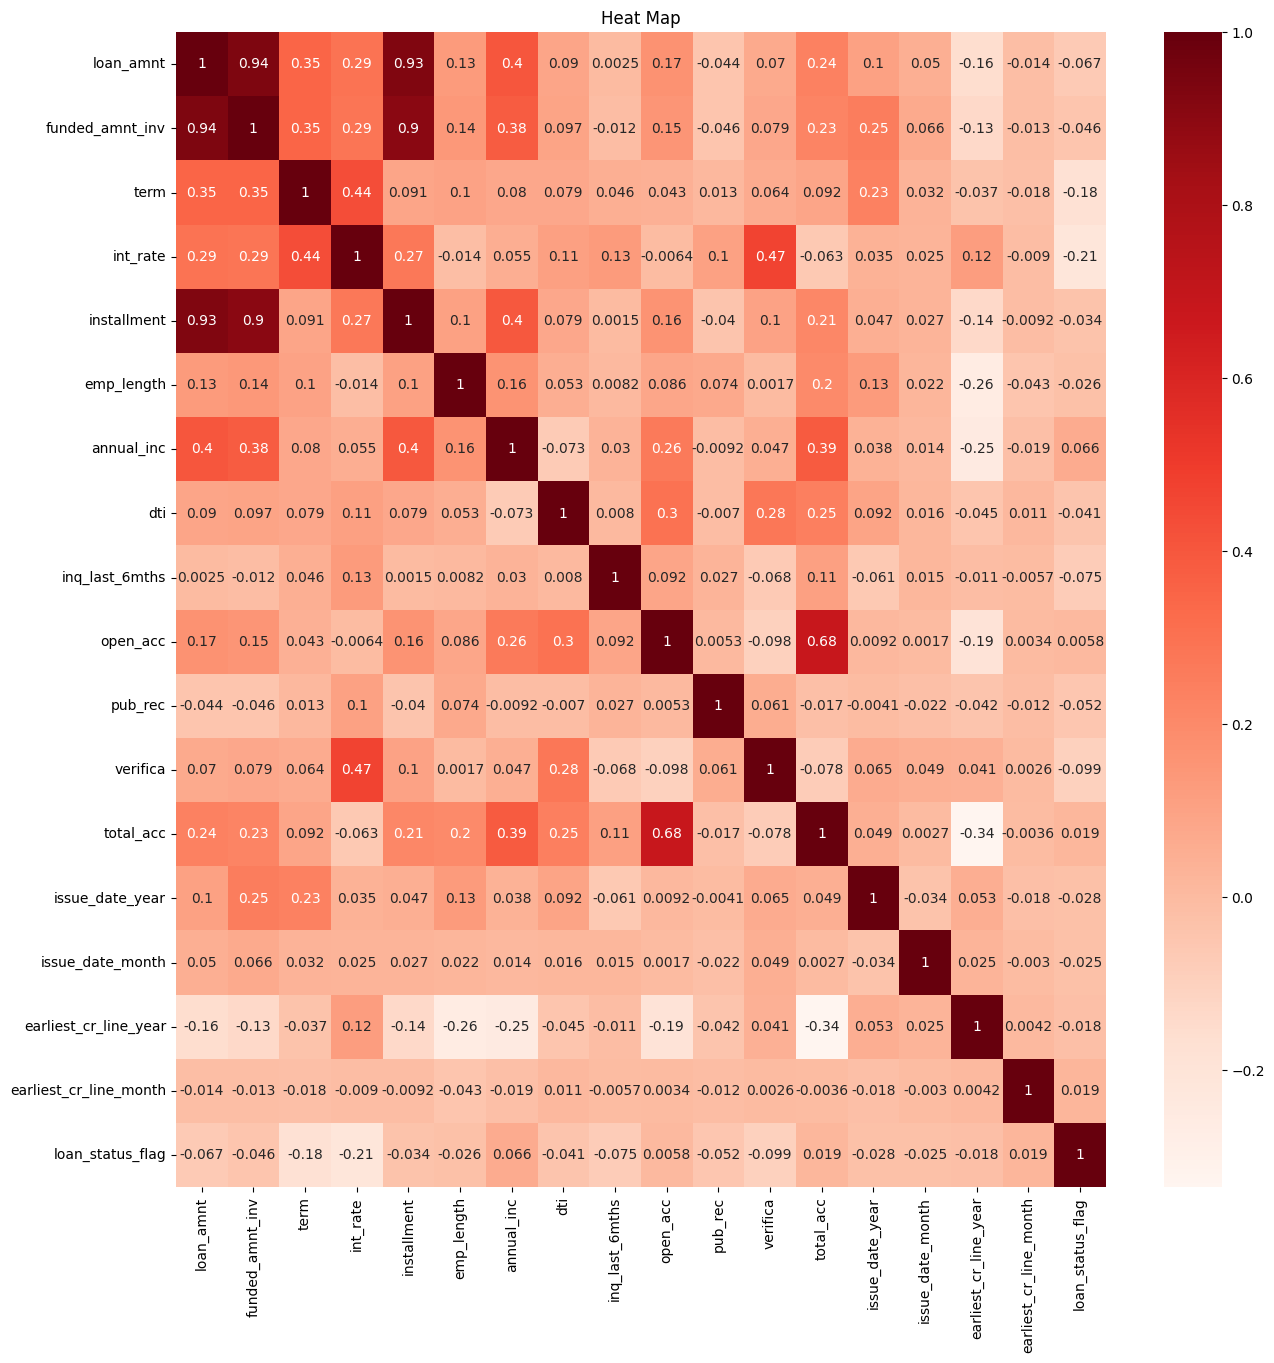

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,verifica,total_acc,issue_date_year,issue_date_month,earliest_cr_line_year,earliest_cr_line_month,loan_status_flag
loan_amnt,1.000000,0.936941,0.349442,0.292707,0.931407,0.131205,0.402568,0.089848,0.002491,0.165385,-0.044241,0.070480,0.238147,0.104470,0.049912,-0.156969,-0.013957,-0.067370
funded_amnt_inv,0.936941,1.000000,0.348296,0.290425,0.902631,0.144124,0.381785,0.096596,-0.011824,0.150750,-0.046412,0.079098,0.225465,0.249159,0.066217,-0.134332,-0.013434,-0.045663
term,0.349442,0.348296,1.000000,0.436447,0.091336,0.100443,0.079824,0.078695,0.046103,0.043022,0.013058,0.063540,0.091985,0.234171,0.031724,-0.037206,-0.017919,-0.176331
int_rate,0.292707,0.290425,0.436447,1.000000,0.270562,-0.013769,0.055497,0.112344,0.133865,-0.006390,0.104081,0.469525,-0.062721,0.035466,0.025304,0.119228,-0.009019,-0.211899
installment,0.931407,0.902631,0.091336,0.270562,1.000000,0.102717,0.397597,0.078913,0.001481,0.160165,-0.040305,0.102438,0.211465,0.047308,0.026972,-0.135201,-0.009161,-0.034073
emp_length,0.131205,0.144124,0.100443,-0.013769,0.102717,1.000000,0.160473,0.052603,0.008153,0.085667,0.074437,0.001692,0.198560,0.132987,0.021997,-0.257317,-0.043450,-0.025676
annual_inc,0.402568,0.381785,0.079824,0.055497,0.397597,0.160473,1.000000,-0.073368,0.030488,0.264505,-0.009213,0.046576,0.385762,0.038209,0.013745,-0.251786,-0.018912,0.065668
dti,0.089848,0.096596,0.078695,0.112344,0.078913,0.052603,-0.073368,1.000000,0.007972,0.298570,-0.007012,0.277138,0.245701,0.092276,0.016092,-0.044557,0.010583,-0.041253
inq_last_6mths,0.002491,-0.011824,0.046103,0.133865,0.001481,0.008153,0.030488,0.007972,1.000000,0.092073,0.026993,-0.067799,0.109486,-0.061397,0.014986,-0.011369,-0.005714,-0.075337
open_acc,0.165385,0.150750,0.043022,-0.006390,0.160165,0.085667,0.264505,0.298570,0.092073,1.000000,0.005271,-0.097874,0.683886,0.009219,0.001727,-0.191253,0.003376,0.005805


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = lend_data.select_dtypes(include=[np.number])

# Plot heatmap on all numerical variables for correlation analysis
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), cmap="Reds", annot=True)
plt.title("Heat Map")
plt.show()

# Display correlation matrix
numeric_data.corr()

##### Heat Map - Correlation Insights
Loan Amount, Funded value investor, annual income, Installemts, interest rate, revolving utilization, and term are correlated loan status determination

In [102]:
import datetime, pytz; 
print("Current Time in IST:", datetime.datetime.now(pytz.utc).astimezone(pytz.timezone('Asia/Kolkata')).strftime('%Y-%m-%d %H:%M:%S'))


Current Time in IST: 2025-02-11 20:07:23
